<a href="https://colab.research.google.com/github/KieranPereira/Traffic-Sign-Detection/blob/main/Road_sign_Data_Formatting_and_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and Installations

In [ ]:
!pip install pandas
import os
import shutil
import cv2
import json
import pandas as pd
from PIL import Image
from functools import *
import json
import time
import yaml
import zipfile
import matplotlib.pyplot as plt
import pandas
import seaborn as sns
import csv
import numpy as np
from google.colab.patches import cv2_imshow
!pip install gitpython
import glob


from sklearn.metrics import f1_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.7 MB/s eta 0:00:00


In [ ]:
#Linking Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Unzipping Data from Drive

Between this step and the last, I compressed the Train and Validation folders that contained respective images and labels. I carried this out locally (compressing files on my computer and uploading them) as doing this through colab would have taken significantly longer

In [ ]:
os.chdir("/content")

In [ ]:
#Unzipping Train files to Colab
with zipfile.ZipFile("/content/drive/MyDrive/Zipped Files/Train.zip","r") as zip_ref:
  zip_ref.extractall()

In [ ]:
#Unzipping Validation files to Colab
with zipfile.ZipFile("/content/drive/MyDrive/Zipped Files/Validation.zip","r") as zip_ref1:
  zip_ref1.extractall()

In [ ]:
os.getcwd()

'/content'

In [ ]:
#Unzipping Small_test files to Colab
if os.path.exists("/content/Original") ==True:
  shutil.rmtree("/content/Original")
os.chdir("/content")
os.mkdir("small_test")
os.chdir("small_test")
with zipfile.ZipFile("/content/drive/MyDrive/RoadSignDataset/Train/TEST/Original.zip","r") as zip_ref1:
  zip_ref1.extractall()

In [ ]:
#Unzipping Testing files to Colab
os.chdir("/content")
os.mkdir("Test")
os.chdir("/content/Test")

with zipfile.ZipFile("/content/drive/MyDrive/RoadSignDataset/Test/test.zip","r") as zip_ref:
  zip_ref.extractall()
with zipfile.ZipFile("/content/drive/MyDrive/RoadSignDataset/Test/test_annotations.zip","r") as zip_ref:
  zip_ref.extractall()

# Dataset Manipulation (Mapillary Data)


In [ ]:
#Reading information from json file to find class numbers - Creates labelstring which is used for yaml file later on. (Done locally on computer as colab takes a while.)
os.chdir("mtsd_v2_fully_annotated/annotations")
labelstring=[]
for file in os.listdir():
    with open(file,"r") as j:
        data = json.load(j)
        for instance in range(0,len(data["objects"])):
        #str(file).replace(".json",".txt")
            print(data["objects"][instance]["label"])
            with open("labelclasses.txt","w") as t:
                if str(data["objects"][instance]["label"]) not in labelstring:
                    labelstring.append(data["objects"][instance]["label"])
                for line in labelstring:
                    t.write("%s\n"%line)
# print("DONE")
with open("labelclasses.txt","r") as fp:
    x= len(fp.readlines())
    print("Total number of classes: ",x)
#Total number of classes = 401

In [ ]:
#Counting Number of files in folders (To ensure completeness)
while os.getcwd()!="/content":
  os.chdir("..")
count = 0
for entry in os.listdir("/content/drive/MyDrive/RoadSignDataset/Train/labels"):
  count= count+1
print(count)

In [ ]:
#counting splits
while os.getcwd()!="/content":
  os.chdir("..")
os.chdir("/content/drive/MyDrive/RoadSignDataset/mtsd_v2_fully_annotated GREEN/splits")
with open("val.txt","r") as v:
  x= len(v.readlines())
  print(x)
with open("test.txt","r") as test:
  x= len(test.readlines())
  print(x)
with open("train.txt","r") as train:
  x= len(train.readlines())
  print(x)

In [ ]:
#Writing Class list yaml file- same as labelstring list made previously had to include this step to move list from VS to Colab:
with open("/content/drive/MyDrive/RoadSignDataset/mtsd_v2_fully_annotated GREEN/labelclasses.txt") as f:
  class_list = f.readlines()
  class_list = [x.strip() for x in class_list]
print(class_list)

['other-sign', 'regulatory--keep-right--g1', 'regulatory--priority-over-oncoming-vehicles--g1', 'regulatory--height-limit--g1', 'regulatory--maximum-speed-limit-35--g2', 'warning--railroad-crossing-with-barriers--g1', 'warning--curve-left--g2', 'warning--falling-rocks-or-debris-right--g1', 'regulatory--keep-right--g4', 'warning--pedestrians-crossing--g4', 'complementary--go-right--g2', 'complementary--keep-left--g1', 'regulatory--maximum-speed-limit-45--g3', 'complementary--chevron-right--g3', 'regulatory--one-way-right--g2', 'regulatory--yield--g1', 'regulatory--one-way-straight--g1', 'warning--curve-right--g1', 'regulatory--pedestrians-only--g2', 'information--emergency-facility--g2', 'regulatory--no-entry--g1', 'warning--railroad-crossing--g3', 'warning--pedestrians-crossing--g5', 'warning--crossroads--g3', 'complementary--chevron-left--g5', 'information--motorway--g1', 'regulatory--no-stopping--g15', 'information--pedestrians-crossing--g1', 'warning--railroad-crossing-without-barri

#Creating File Structure for YOLOv5 from Mapillary Data


In [ ]:
#Moving Training files
os.chdir("/content/drive/MyDrive/RoadSignDataset/mtsd_fully_annotated_images_train1 GREEN")
for entry in os.listdir():
  shutil.move(entry,"../Train/images")

os.chdir("/content/drive/MyDrive/RoadSignDataset/mtsd_fully_annotated_images_train2 GREEN")
for entry in os.listdir():
  shutil.move(entry,"../Train/images")

os.chdir("/content/drive/MyDrive/RoadSignDataset/mtsd_fully_annotated_images_train0/images")
for entry in os.listdir():
  shutil.move(entry,"../Train/images")

In [ ]:
#Moving Validation Files
while os.getcwd()!="/content":
  os.chdir("..")
print(os.getcwd())
os.chdir("/content/drive/MyDrive/RoadSignDataset/mtsd_fully_annotated_images_val")
for entry in os.listdir():
  shutil.move(entry,"../Validation/images")

#Initial Dataset Description

In [ ]:
def Num_of_Classes(path):
  os.chdir(path)
  class_list= []
  for file in os.listdir(path):
    if ".txt" not in file:
      return "Incorrect path or check directory"
      break
    with open(str(file),"r") as text_file:
      for line in text_file:
        word_split = line.split()
        if word_split[0] not in class_list:
          class_list.append(word_split[0])
  return class_list
print("Number of Training Classes = {}".format(len(Num_of_Classes("/content/Train/labels"))))
print("Number of Validation Classes = {}".format(len(Num_of_Classes("/content/Validation/labels"))))

Number of Training Classes = 401
Number of Validation Classes = 391


In [ ]:
#Finding the number of instances for class

class_list = Num_of_Classes("/content/Train/labels")
class_list_final= []
for i in class_list:
  class_list_final.append(int(i))
class_list_final.sort()
line_num = -1
label_dict = {}
with open("/content/drive/MyDrive/RoadSignDataset/mtsd_v2_fully_annotated GREEN/labelclasses.txt","r") as file:
  for line in file:
    if "\n" in line:
      line.replace("\n","")
    line_num +=1
    if line_num in class_list_final:
      label_dict[line_num] = line

In [ ]:
#Finding frequency

os.chdir("/content/Train/labels")
label_dict1 = {}
Labels_with_freq = {}
for i in os.listdir():
  with open(str(i),"r") as file:
    for line in file:
      words_split = line.split()
      if words_split[0] in label_dict1:
        label_dict1[words_split[0]] += 1
      else:
        label_dict1[words_split[0]] = 1
for key, value in label_dict1.items():
  Labels_with_freq[label_dict[int(key)]] = value


In [ ]:
number_of_instances = 0
for key,value in Labels_with_freq.items():
  number_of_instances += value
print("Number of labels= {}".format(number_of_instances))
print("Percentage of \"other\" signs= {}%".format(int(Labels_with_freq['other-sign\n']/number_of_instances *100)))

Number of labels= 180286
Percentage of "other" signs= 65%


In [ ]:
del Labels_with_freq['other-sign\n']

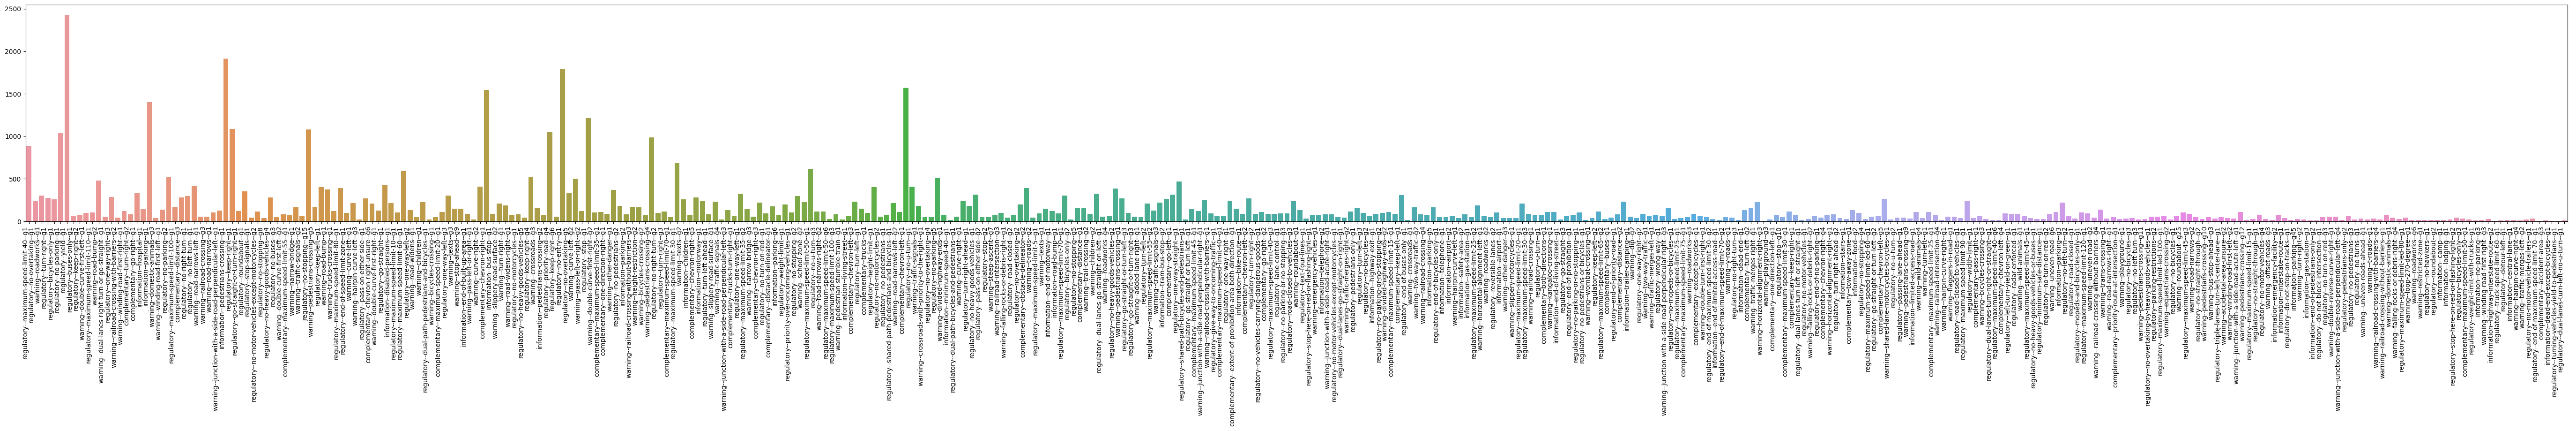

In [ ]:
Names = list(Labels_with_freq.keys())
Score = list(Labels_with_freq.values())
fig, ax = plt.subplots(figsize = (70,6))
sns.barplot(x = Names,y=Score, ax= ax)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:

os.chdir("/content")
# Define the number of subplots
num_subplots = 10

# Delete the directory if it exists
if os.path.exists("subplot_images"):
    shutil.rmtree("/content/subplot_images")
# Create the directory to store the subplot images
os.mkdir("subplot_images")

# Get the names and scores from the dictionary
Names = list(Labels_with_freq.keys())
Score = list(Labels_with_freq.values())

# Calculate the number of rows needed for the subplots
num_rows = (num_subplots + 1) // 2

# Create the subplots and save each subplot as a separate image
for i in range(num_subplots):
    # Calculate the start and end indices for the sliced lists
    start = i * len(Names) // num_subplots
    end = (i + 1) * len(Names) // num_subplots
    
    # Create a bar plot for the current subplot
    fig, ax = plt.subplots(figsize=(30, 10))
    sns.barplot(x=Names[start:end], y=Score[start:end], ax=ax)
    
    # Set the x-axis tick labels to the sliced names and rotate them vertically
    ax.set_xticklabels(labels=Names[start:end], rotation='vertical',fontsize= 14)
    
    # Set the x-axis and y-axis labels for the current subplot
    ax.set_xlabel('Class Name',fontsize=14)
    ax.set_ylabel('Number of Instances',fontsize=14)
    ax.set_ylim([0, max(Score)])

    # Save the current subplot as an image
    plt.savefig(f"subplot_images/subplot_{i}.png", bbox_inches='tight')
    
    plt.close(fig)

In [ ]:
def zip_directory(directory_path, zip_file_path):
    with zipfile.ZipFile(zip_file_path, 'w', zipfile.ZIP_DEFLATED) as zip_file:
        for root, dirs, files in os.walk(directory_path):
            for file in files:
                file_path = os.path.join(root, file)
                zip_file.write(file_path, os.path.relpath(file_path, directory_path))
zip_directory('/content/subplot_images', '/content/subplot_images.zip')

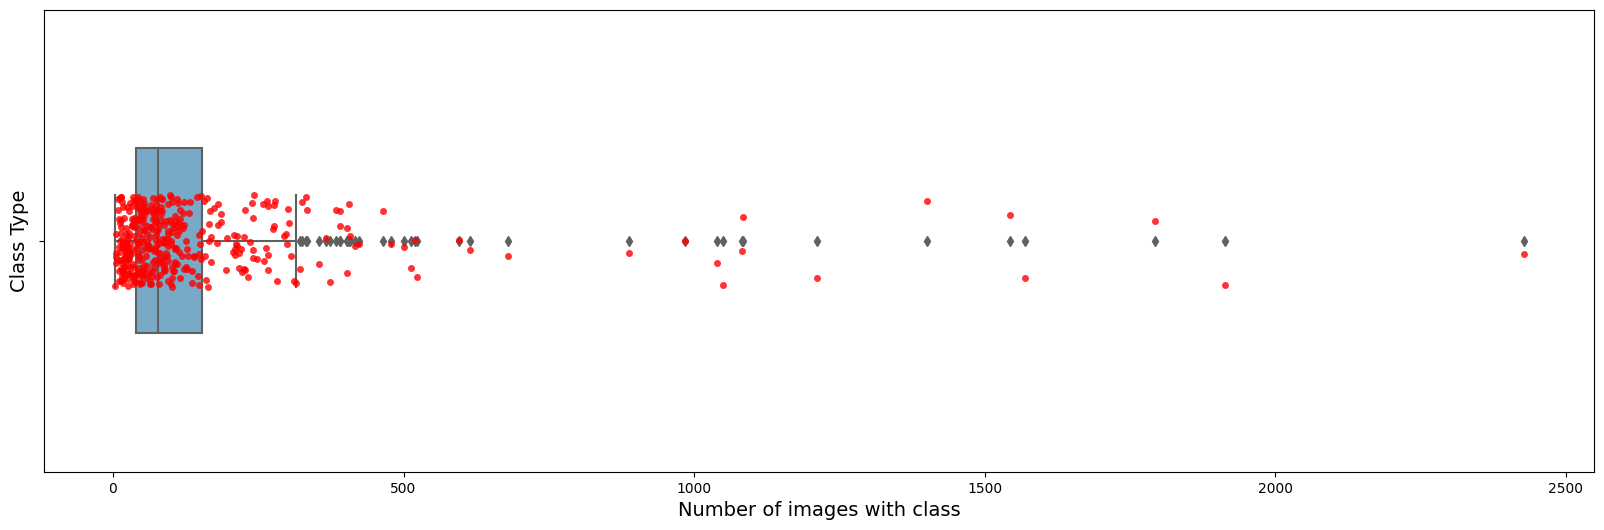

In [ ]:
# Creating boxplot
fig, ax = plt.subplots(figsize = (20,6))
sns.boxplot(x = Score,width = 0.4, ax = ax, palette= "Blues")
sns.color_palette("husl",1)
boxplot = sns.stripplot(x=Score,marker="o", alpha=0.8, color="red", s=5)
# Adding x-axis label
ax.set_xlabel('Number of images with class', fontsize=14)
# Adding y-axis label
ax.set_ylabel('Class Type', fontsize=14)
# Setting the fontsize for all text
plt.rcParams['font.size'] = 14

# Converting Annotations From Mapillary Format to YOLO .txt Format

In [ ]:
#Moving Validation Labels into respective folders:
def move_file(text_file,final_dest):
  orginal_path = os.getcwd()
  while os.getcwd()!="/content":
    os.chdir("..")
  os.chdir("/content/drive/MyDrive/RoadSignDataset/mtsd_v2_fully_annotated GREEN/splits")
  with open(text_file,"r") as f:
    for line in f:
      shutil.move(str("/content/drive/MyDrive/RoadSignDataset/mtsd_v2_fully_annotated GREEN/annotations/"+line).replace("\n","")+".json",final_dest)
move_file("val.txt","/content/drive/MyDrive/RoadSignDataset/Validation/jsonlabels")


Error: ignored

In [ ]:
#Moving Training labels into respective folder:
move_file("train.txt","/content/drive/MyDrive/RoadSignDataset/Train/jsonlabels")

In [ ]:
#Moving all remaining training labels to respective folder:
while os.getcwd()!="/content":
  os.chdir("..")
os.chdir("/content/drive/MyDrive/RoadSignDataset/mtsd_v2_fully_annotated GREEN/annotations")
for file in os.listdir():
  if ".json" in file:
    shutil.move(file, "/content/drive/MyDrive/RoadSignDataset/Train/jsonlabels")

In [ ]:
#writing .txt files for validation files
while os.getcwd()!="/content":
  os.chdir("..")

def labelwrite(path_to_img,dest_path):
  os.chdir(path_to_img)
  for file in os.listdir():
    with open(file, "r") as j:
      data = json.load(j)
      w = open(str(file).replace("json","txt"), "w")
      w.write("")
      w.close
      for instance in range(0,len(data["objects"])):
        with open(str(file).replace("json","txt"),"a") as t:
          x= ((float(data["objects"][instance]["bbox"]["xmax"])+float(data["objects"][instance]["bbox"]["xmin"]))/2)/float(data["width"])
          y= ((float(data["objects"][instance]["bbox"]["ymax"])+float(data["objects"][instance]["bbox"]["ymin"]))/2)/float(data["height"])
          width= (float(data["objects"][instance]["bbox"]["xmax"])-float(data["objects"][instance]["bbox"]["xmin"]))/float(data["width"])
          height= (float(data["objects"][instance]["bbox"]["ymax"])-float(data["objects"][instance]["bbox"]["ymin"]))/float(data["height"])
          print("x="+str(x))
          t.write(str(class_list.index(data["objects"][instance]["label"]))+" "+ str(x) + " "+ str(y) + " " + str(width) + " " + str(height) +"\n")
    shutil.move(str(file).replace("json","txt"),dest_path)


In [ ]:
labelwrite("/content/drive/MyDrive/RoadSignDataset/Validation/jsonlabels","/content/drive/MyDrive/RoadSignDataset/Validation/labels")
labelwrite("/content/drive/MyDrive/RoadSignDataset/Train/jsonlabels","/content/drive/MyDrive/RoadSignDataset/Train/labels")

In [ ]:
#Checking for unlabelled validation files
os.chdir("/content/drive/MyDrive/RoadSignDataset/Validation/jsonlabels")
for entry in os.listdir():
  if ".json" in entry:
    if os.path.exists(str(entry).replace(".json",".txt"))== False:
      print(entry)

In [ ]:
#moving .txt files to correct folder for validation files
while os.getcwd()!="/content":
  os.chdir("..")
os.chdir("/content/drive/MyDrive/RoadSignDataset/Validation/jsonlabels")
for file in os.listdir():
  if ".txt" in file:
    shutil.move(file,"/content/drive/MyDrive/RoadSignDataset/Validation/labels")

In [ ]:
#moving .txt files to correct folder for training files
while os.getcwd()!="/content":
  os.chdir("..")
os.chdir("/content/drive/MyDrive/RoadSignDataset/Train/jsonlabels")
for file in os.listdir():
  if ".txt" in file:
    shutil.move(file,"/content/drive/MyDrive/RoadSignDataset/Train/labels")

In [ ]:
os.chdir("/content")

# Removing unnessesary classes

In [ ]:
while os.getcwd()!="/content":
  os.chdir("..")
#Choosing selected classes to be removed
unusedclasslist = [0,3,5,7,21,28,29,32,39,44,47,57,63,67,74,75,77,80,84,85,89,91,94,102,104,105,120,124,125,126,127,128,131,132,134,138,139,140,141,142,145,146,152,160,163,162,165,166,168,169,170,174,184,185,186,187,188,189,190,191,194,195,198,200,202,205,210,215,221,222,232,237,238,250,254,255,258,259,260,269,270,274,275,277,280,281,282,285,286,287,288,292,295,296,297,301,304,305,306,308,309,310,315,316,319,322,324,325,331,334,335,336,338,341,343,342,345,348,351,352,353,355,356,358,359,360,362,364,365,367,368,369,371,372,373,374,375,377,379,380,381,383,385,386,389,390,393,395,396,398]
# Finding a list of classes without information
# or complementary classes

# Removing all information and complementary classes from labels
lineNumber = -1
Chosen_Word = "information"
Chosen_Word2= "complementary"
if os.path.exists("/content/drive/MyDrive/RoadSignDataset/mtsd_v2_fully_annotated GREEN/newlabelclasses.txt") ==True:
  os.remove("/content/drive/MyDrive/RoadSignDataset/mtsd_v2_fully_annotated GREEN/newlabelclasses.txt")
os.chdir("/content/drive/MyDrive/RoadSignDataset/mtsd_v2_fully_annotated GREEN")
with open("labelclasses.txt","r") as fileData:
  for line in fileData:
    lineNumber += 1
    if Chosen_Word in line:
      unusedclasslist.append(lineNumber)
    elif Chosen_Word2 in line:
      unusedclasslist.append(lineNumber)
    elif Chosen_Word or Chosen_Word2 not in line:
      # Creating a list of new classes
      if lineNumber not in unusedclasslist:
        with open("newlabelclasses.txt","a") as new:
          new.write(line)
print(unusedclasslist)
new = []
dup = []
for i in unusedclasslist:
  if i not in new:
    new.append(i)
  else:
    dup.append(i)
unusedclasslist = new

[0, 3, 5, 7, 21, 28, 29, 32, 39, 44, 47, 57, 63, 67, 74, 75, 77, 80, 84, 85, 89, 91, 94, 102, 104, 105, 120, 124, 125, 126, 127, 128, 131, 132, 134, 138, 139, 140, 141, 142, 145, 146, 152, 160, 163, 162, 165, 166, 168, 169, 170, 174, 184, 185, 186, 187, 188, 189, 190, 191, 194, 195, 198, 200, 202, 205, 210, 215, 221, 222, 232, 237, 238, 250, 254, 255, 258, 259, 260, 269, 270, 274, 275, 277, 280, 281, 282, 285, 286, 287, 288, 292, 295, 296, 297, 301, 304, 305, 306, 308, 309, 310, 315, 316, 319, 322, 324, 325, 331, 334, 335, 336, 338, 341, 343, 342, 345, 348, 351, 352, 353, 355, 356, 358, 359, 360, 362, 364, 365, 367, 368, 369, 371, 372, 373, 374, 375, 377, 379, 380, 381, 383, 385, 386, 389, 390, 393, 395, 396, 398, 10, 11, 13, 19, 24, 25, 27, 30, 31, 34, 35, 36, 40, 42, 49, 51, 53, 56, 59, 65, 68, 79, 82, 95, 99, 107, 117, 121, 126, 135, 147, 148, 151, 157, 158, 161, 162, 164, 171, 173, 176, 179, 181, 182, 192, 196, 201, 209, 214, 216, 218, 220, 226, 228, 234, 235, 239, 240, 246, 247, 2

In [ ]:
len(unusedclasslist)

237

In [ ]:
# Removing all unwanted classes from training labels
os.chdir("/content/Train/labels")
# Checking how many images were removed
Original_Size = len(os.listdir())
for filename in os.listdir():
  with open(str(filename),"r") as file:
    with open("temp.txt","w") as output:
      for line in file:
        word_split = line.split()
        if int(word_split[0]) not in unusedclasslist:
          output.write(line)
  os.replace("temp.txt",str(filename))
  if os.path.getsize(str(filename)) ==0:
    os.remove(str(filename))
Updated_Size = len(os.listdir())
print("Number of files removed = {}".format(int(Original_Size-Updated_Size)))

# Removing all unwanted classes from training labels
os.chdir("/content/Validation/labels")
# Checking how many images were removed
Original_Size = len(os.listdir())
for filename in os.listdir():
  with open(str(filename),"r") as file:
    with open("temp.txt","w") as output:
      for line in file:
        word_split = line.split()
        if int(word_split[0]) not in unusedclasslist:
          output.write(line)
  os.replace("temp.txt",str(filename))
  if os.path.getsize(str(filename)) ==0:
    os.remove(str(filename))
Updated_Size = len(os.listdir())
print("Number of files removed = {}".format(int(Original_Size-Updated_Size)))

Number of files removed = 17982
Number of files removed = 2634


In [ ]:
print(len(os.listdir("/content/Train/labels")))

18607


In [ ]:
#Removing all unlabelled training images
os.chdir("/content/Train/images")
numberofremovedimages = 0
for image in os.listdir():
  os.chdir("/content/Train/labels")
  if os.path.exists(str(image).replace(".jpg",".txt")) ==False:
    os.chdir("/content/Train/images")
    os.remove(image)
    numberofremovedimages +=1
  else:
    os.chdir("/content/Train/images")

In [ ]:
#Removing all unlabelled validation images
os.chdir("/content/Validation/images")
numberofremovedimages = 0
for image in os.listdir():
  os.chdir("/content/Validation/labels")
  if os.path.exists(str(image).replace(".jpg",".txt")) ==False:
    os.chdir("/content/Validation/images")
    os.remove(image)
    numberofremovedimages +=1
  else:
    os.chdir("/content/Validation/images")

In [ ]:
print(numberofremovedimages)

2634


# Description after removing unnessesary classes

In [ ]:
print("Number of Training Classes = {}".format(len(Num_of_Classes("/content/Train/labels"))))
print("Number of Validation Classes = {}".format(len(Num_of_Classes("/content/Validation/labels"))))

Number of Training Classes = 164
Number of Validation Classes = 162


In [ ]:
#Finding the number of instances for class

class_list = Num_of_Classes("/content/Train/labels")
class_list_final= []
for i in class_list:
  class_list_final.append(int(i))
class_list_final.sort()
line_num = -1
label_dict = {}
with open("/content/drive/MyDrive/RoadSignDataset/mtsd_v2_fully_annotated GREEN/labelclasses.txt","r") as file:
  for line in file:
    if "\n" in line:
      line.replace("\n","")
    line_num +=1
    if line_num in class_list_final:
      label_dict[line_num] = line

In [ ]:
#Finding frequency

os.chdir("/content/Train/labels")
label_dict1 = {}
Labels_with_freq = {}
for i in os.listdir():
  with open(str(i),"r") as file:
    for line in file:
      words_split = line.split()
      if words_split[0] in label_dict1:
        label_dict1[words_split[0]] += 1
      else:
        label_dict1[words_split[0]] = 1
for key, value in label_dict1.items():
  Labels_with_freq[label_dict[int(key)]] = value


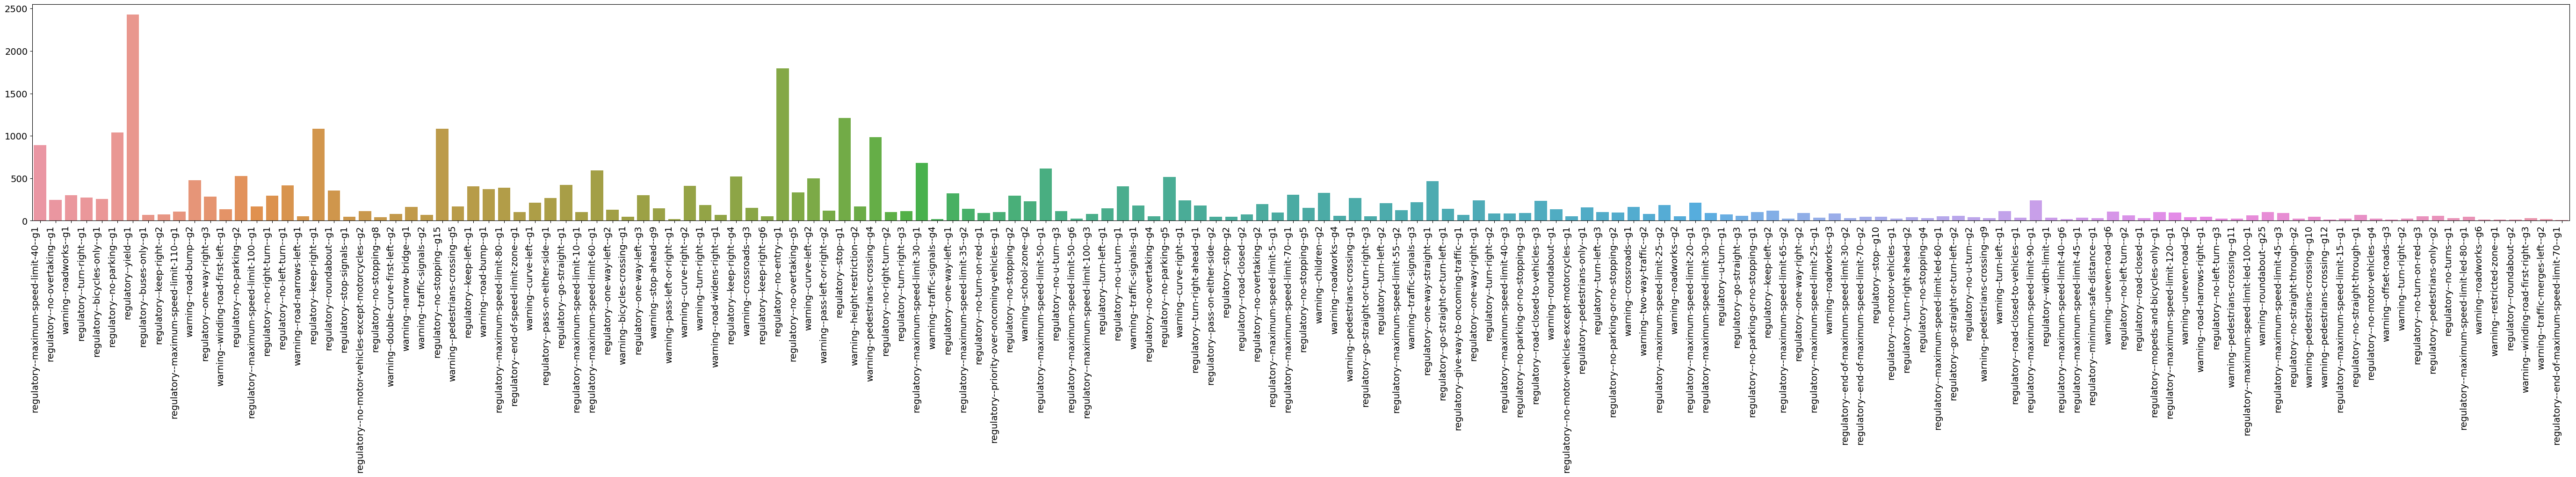

In [ ]:
Names = list(Labels_with_freq.keys())
Score = list(Labels_with_freq.values())
fig, ax = plt.subplots(figsize = (70,6))
sns.barplot(x = Names,y=Score, ax= ax)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:

os.chdir("/content")
# Define the number of subplots
num_subplots = 4

# Delete the directory if it exists
if os.path.exists("subplot_images"):
    shutil.rmtree("/content/subplot_images")
# Create the directory to store the subplot images
os.mkdir("subplot_images")

# Get the names and scores from the dictionary
Names = list(Labels_with_freq.keys())
Score = list(Labels_with_freq.values())

# Calculate the number of rows needed for the subplots
num_rows = (num_subplots + 1) // 2

# Create the subplots and save each subplot as a separate image
for i in range(num_subplots):
    # Calculate the start and end indices for the sliced lists
    start = i * len(Names) // num_subplots
    end = (i + 1) * len(Names) // num_subplots
    
    # Create a bar plot for the current subplot
    fig, ax = plt.subplots(figsize=(30, 10))
    sns.barplot(x=Names[start:end], y=Score[start:end], ax=ax)
    
    # Set the x-axis tick labels to the sliced names and rotate them vertically
    ax.set_xticklabels(labels=Names[start:end], rotation='vertical',fontsize= 14)
    
    # Set the x-axis and y-axis labels for the current subplot
    ax.set_xlabel('Class Name',fontsize=14)
    ax.set_ylabel('Number of Instances',fontsize=14)
    ax.set_ylim([0, max(Score)])

    # Save the current subplot as an image
    plt.savefig(f"subplot_images/subplot_{i}.png", bbox_inches='tight')
    
    plt.close(fig)

In [ ]:
def zip_directory(directory_path, zip_file_path):
    with zipfile.ZipFile(zip_file_path, 'w', zipfile.ZIP_DEFLATED) as zip_file:
        for root, dirs, files in os.walk(directory_path):
            for file in files:
                file_path = os.path.join(root, file)
                zip_file.write(file_path, os.path.relpath(file_path, directory_path))
zip_directory('/content/subplot_images', '/content/subplot_images.zip')

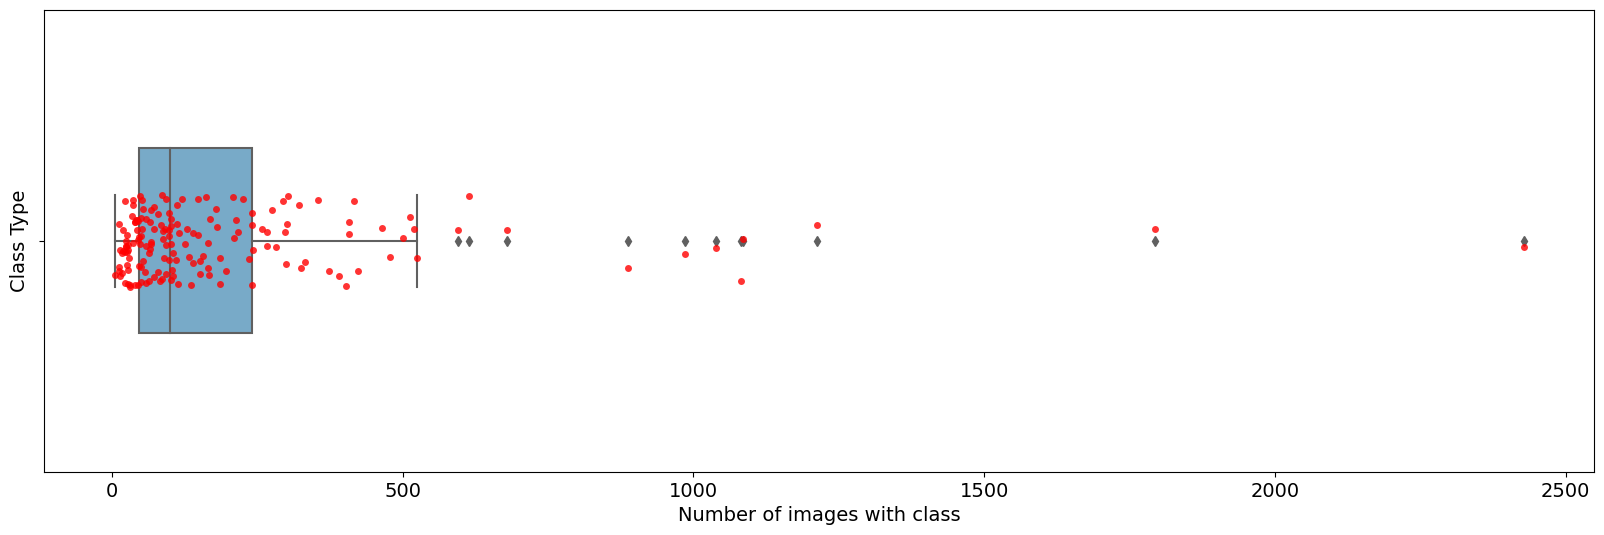

In [ ]:
# Creating boxplot
fig, ax = plt.subplots(figsize = (20,6))
sns.boxplot(x = Score,width = 0.4, ax = ax, palette= "Blues")
sns.color_palette("husl",1)
boxplot = sns.stripplot(x=Score,marker="o", alpha=0.8, color="red", s=5)
# Adding x-axis label
ax.set_xlabel('Number of images with class', fontsize=14)
# Adding y-axis label
ax.set_ylabel('Class Type', fontsize=14)
# Setting the fontsize for all text
plt.rcParams['font.size'] = 14

#Further reduction of dataset for low instance classes

In [ ]:
#Creating a dictionary that maps labels used for other regions to the used region

In [ ]:
#Finding the number of classes in training labels
os.chdir("/content/Train/labels")
class_list= []
for file in os.listdir():
  with open(str(file),"r") as text_file:
    for line in text_file:
      word_split = line.split()
      if word_split[0] not in class_list:
        class_list.append(word_split[0])
print("Number of classes = {}".format(len(class_list)))

Number of classes = 164


In [ ]:
class_names = []
class_names1 = []
duplicates = []
Dup2Original = {}
replacing_values = {}
name_key_dict = {}
#Finding the number of instances for class
class_list_final = []
for i in class_list:
  class_list_final.append(int(i))
class_list_final.sort()
line_num = -1
name_key_dict = {}
with open("/content/drive/MyDrive/RoadSignDataset/mtsd_v2_fully_annotated GREEN/labelclasses.txt","r") as file:
  for line in file:
    if "\n" in line:
      line =line.replace("\n","")
    line_num +=1
    if line_num in class_list_final:
      name_key_dict[line_num] = line
for key, value in name_key_dict.items():
  value_split = str(value).replace("\n","").split("--")
  if str(value_split[0]+" "+ value_split[1]) not in class_names:
    class_names.append(value_split[0]+" "+ value_split[1])
    class_names1.append(str(value_split[0]+"--"+value_split[1]+"--"+value_split[2]))
  else:
    duplicates.append(str(value_split[0]+"--"+value_split[1]+"--"+value_split[2]))

for i in duplicates:
  for j in class_names1:
    word_split = str(j).replace("\n","").split("--")
    dup_split = i.split("--")
    if word_split[0]+ word_split[1] == dup_split[0]+dup_split[1]:
      Dup2Original[list(name_key_dict.keys())[list(name_key_dict.values()).index(i)]] = list(name_key_dict.keys())[list(name_key_dict.values()).index(j)]
    

In [ ]:
name_key_dict[172]

'regulatory--maximum-speed-limit-55--g2'

In [ ]:
os.chdir("/content/Train/labels")
for i in os.listdir():
  with open(i,"r") as text_file:
    with open("temp.txt", "w") as temp:
      for line in text_file:
        word_split = line.split()
        if int(word_split[0]) in list(Dup2Original.keys()):
          temp.write(line.replace(word_split[0],str(Dup2Original[int(word_split[0])])))
        else:
          temp.write(line)
  os.remove(i)
  os.rename("temp.txt",i)

os.chdir("/content/Validation/labels")
for i in os.listdir():
  with open(i,"r") as text_file:
    with open("temp.txt", "w") as temp:
      for line in text_file:
        word_split = line.split()
        if int(word_split[0]) in list(Dup2Original.keys()):
          temp.write(line.replace(word_split[0],str(Dup2Original[int(word_split[0])])))
        else:
          temp.write(line)
  os.remove(i)
  os.rename("temp.txt",i)


In [ ]:
#Finding the number of classes in training labels
os.chdir("/content/Train/labels")
class_list= []
for file in os.listdir():
  with open(str(file),"r") as text_file:
    for line in text_file:
      word_split = line.split()
      if word_split[0] not in class_list:
        class_list.append(word_split[0])
print("Number of classes = {}".format(len(class_list)))

Number of classes = 93


In [ ]:
#Finding the number of classes in validation labels
os.chdir("/content/Validation/labels")
for file in os.listdir():
  with open(str(file),"r") as text_file:
    for line in text_file:
      word_split = line.split()
      if word_split[0] not in class_list:
        class_list.append(word_split[0])
print("Number of classes = {}".format(len(class_list)))

Number of classes = 93


In [ ]:
#Finding the number of instances for class
class_list_final = []
for i in class_list:
  class_list_final.append(int(i))
class_list_final.sort()
line_num = -1
name_key_dict = {}
with open("/content/drive/MyDrive/RoadSignDataset/mtsd_v2_fully_annotated GREEN/labelclasses.txt","r") as file:
  for line in file:
    if "\n" in line:
      line =line.replace("\n","")
    line_num +=1
    if line_num in class_list_final:
      name_key_dict[line_num] = line

In [ ]:
#Finding frequency
os.chdir("/content/Train/labels")
label_dict1 = {}
Labels_with_freq = {}
for i in os.listdir():
  with open(str(i),"r") as file:
    for line in file:
      words_split = line.split()
      if words_split[0] in label_dict1:
        label_dict1[words_split[0]] += 1
      else:
        label_dict1[words_split[0]] = 1
for key, value in label_dict1.items():
  Labels_with_freq[name_key_dict[int(key)]] = value

In [ ]:
#removing classes with frequency lower than 150
min_freq = 150
for i in Labels_with_freq.keys():
  if Labels_with_freq[i] <=min_freq:
    unusedclasslist.append(list(name_key_dict.values()).index(i))
# Removing all unwanted classes from training labels
os.chdir("/content/Train/labels")
# Checking how many images were removed
Original_Size = len(os.listdir())
for filename in os.listdir():
  with open(str(filename),"r") as file:
    with open("temp.txt","w") as output:
      for line in file:
        word_split = line.split()
        if int(word_split[0]) not in unusedclasslist:
          output.write(line)
  os.replace("temp.txt",str(filename))
  if os.path.getsize(str(filename)) ==0:
    os.remove(str(filename))
Updated_Size = len(os.listdir())
print("Number of files removed = {}".format(int(Original_Size-Updated_Size)))

# Removing all unwanted classes from Validation labels
os.chdir("/content/Validation/labels")
# Checking how many images were removed
Original_Size = len(os.listdir())
for filename in os.listdir():
  with open(str(filename),"r") as file:
    with open("temp.txt","w") as output:
      for line in file:
        word_split = line.split()
        if int(word_split[0]) not in unusedclasslist:
          output.write(line)
  os.replace("temp.txt",str(filename))
  if os.path.getsize(str(filename)) ==0:
    os.remove(str(filename))
Updated_Size = len(os.listdir())
print("Number of files removed = {}".format(int(Original_Size-Updated_Size)))


Number of files removed = 4449
Number of files removed = 664


In [ ]:
#Finding the number of classes in training labels
os.chdir("/content/Train/labels")
class_list= []
for file in os.listdir():
  with open(str(file),"r") as text_file:
    for line in text_file:
      word_split = line.split()
      if word_split[0] not in class_list:
        class_list.append(word_split[0])
print("Number of classes = {}".format(len(class_list)))

Number of classes = 75


In [ ]:
#Removing all unlabelled validation images
os.chdir("/content/Validation/images")
numberofremovedimages = 0
for image in os.listdir():
  os.chdir("/content/Validation/labels")
  if os.path.exists(str(image).replace(".jpg",".txt")) ==False:
    os.chdir("/content/Validation/images")
    os.remove(image)
    numberofremovedimages +=1
  else:
    os.chdir("/content/Validation/images")

In [ ]:
#Removing all unlabelled training images
os.chdir("/content/Train/images")
numberofremovedimages = 0
for image in os.listdir():
  os.chdir("/content/Train/labels")
  if os.path.exists(str(image).replace(".jpg",".txt")) ==False:
    os.chdir("/content/Train/images")
    os.remove(image)
    numberofremovedimages +=1
  else:
    os.chdir("/content/Train/images")
print(numberofremovedimages)

4449


In [ ]:
print(len(os.listdir("/content/Train/images"))-len(os.listdir("/content/Train/labels")))
print(len(os.listdir("/content/Validation/images"))-len(os.listdir("/content/Validation/labels")))

0
0


# Grouping regional labels (REPORT)

In [ ]:
#Creating a dictionary that maps labels used for other regions to the used region

In [ ]:
#Finding the number of classes in training labels
os.chdir("/content/Train/labels")
class_list= []
for file in os.listdir():
  with open(str(file),"r") as text_file:
    for line in text_file:
      word_split = line.split()
      if word_split[0] not in class_list:
        class_list.append(word_split[0])
print("Number of classes = {}".format(len(class_list)))

In [ ]:
class_names = []
class_names1 = []
duplicates = []
Dup2Original = {}
replacing_values = {}
name_key_dict = {}
#Finding the number of instances for class
class_list_final = []
for i in class_list:
  class_list_final.append(int(i))
class_list_final.sort()
line_num = -1
name_key_dict = {}
with open("/content/drive/MyDrive/RoadSignDataset/mtsd_v2_fully_annotated GREEN/labelclasses.txt","r") as file:
  for line in file:
    if "\n" in line:
      line =line.replace("\n","")
    line_num +=1
    if line_num in class_list_final:
      name_key_dict[line_num] = line
for key, value in name_key_dict.items():
  value_split = str(value).replace("\n","").split("--")
  if str(value_split[0]+" "+ value_split[1]) not in class_names:
    class_names.append(value_split[0]+" "+ value_split[1])
    class_names1.append(str(value_split[0]+"--"+value_split[1]+"--"+value_split[2]))
  else:
    duplicates.append(str(value_split[0]+"--"+value_split[1]+"--"+value_split[2]))

for i in duplicates:
  for j in class_names1:
    word_split = str(j).replace("\n","").split("--")
    dup_split = i.split("--")
    if word_split[0]+ word_split[1] == dup_split[0]+dup_split[1]:
      Dup2Original[list(name_key_dict.keys())[list(name_key_dict.values()).index(i)]] = list(name_key_dict.keys())[list(name_key_dict.values()).index(j)]
    

In [ ]:
name_key_dict[172]

In [ ]:
os.chdir("/content/Train/labels")
for i in os.listdir():
  with open(i,"r") as text_file:
    with open("temp.txt", "w") as temp:
      for line in text_file:
        word_split = line.split()
        if int(word_split[0]) in list(Dup2Original.keys()):
          temp.write(line.replace(word_split[0],str(Dup2Original[int(word_split[0])])))
        else:
          temp.write(line)
  os.remove(i)
  os.rename("temp.txt",i)

os.chdir("/content/Validation/labels")
for i in os.listdir():
  with open(i,"r") as text_file:
    with open("temp.txt", "w") as temp:
      for line in text_file:
        word_split = line.split()
        if int(word_split[0]) in list(Dup2Original.keys()):
          temp.write(line.replace(word_split[0],str(Dup2Original[int(word_split[0])])))
        else:
          temp.write(line)
  os.remove(i)
  os.rename("temp.txt",i)


In [ ]:
#Finding the number of classes in training labels
os.chdir("/content/Train/labels")
class_list= []
for file in os.listdir():
  with open(str(file),"r") as text_file:
    for line in text_file:
      word_split = line.split()
      if word_split[0] not in class_list:
        class_list.append(word_split[0])
print("Number of classes = {}".format(len(class_list)))

In [ ]:
#Finding the number of classes in validation labels
os.chdir("/content/Validation/labels")
for file in os.listdir():
  with open(str(file),"r") as text_file:
    for line in text_file:
      word_split = line.split()
      if word_split[0] not in class_list:
        class_list.append(word_split[0])
print("Number of classes = {}".format(len(class_list)))

In [ ]:
#Finding frequency
os.chdir("/content/Train/labels")
label_dict1 = {}
Labels_with_freq = {}
for i in os.listdir():
  with open(str(i),"r") as file:
    for line in file:
      words_split = line.split()
      if words_split[0] in label_dict1:
        label_dict1[words_split[0]] += 1
      else:
        label_dict1[words_split[0]] = 1
for key, value in label_dict1.items():
  Labels_with_freq[label_dict[int(key)]] = value


In [ ]:
len(Labels_with_freq)

In [ ]:
# Creating boxplot
fig, ax = plt.subplots(figsize = (20,6))
sns.boxplot(x = Score,width = 0.4, ax = ax, palette= "Blues")
sns.color_palette("husl",1)
boxplot = sns.stripplot(x=Score,marker="o", alpha=0.8, color="red", s=5)
# Adding x-axis label
ax.set_xlabel('Number of images with class', fontsize=16)
# Adding y-axis label
ax.set_ylabel('Class Type', fontsize=16)
# Setting the fontsize for all text
plt.rcParams['font.size'] = 16

# Removing Low instance Classes (REPORT)

In [ ]:
#Finding the number of instances for class
class_list_final = []
for i in class_list:
  class_list_final.append(int(i))
class_list_final.sort()
line_num = -1
name_key_dict = {}
with open("/content/drive/MyDrive/RoadSignDataset/mtsd_v2_fully_annotated GREEN/labelclasses.txt","r") as file:
  for line in file:
    if "\n" in line:
      line =line.replace("\n","")
    line_num +=1
    if line_num in class_list_final:
      name_key_dict[line_num] = line

In [ ]:
#Finding frequency
os.chdir("/content/Train/labels")
class_with_freq = {}
Labels_with_freq = {}
for i in os.listdir():
  with open(str(i),"r") as file:
    for line in file:
      words_split = line.split()
      if words_split[0] in class_with_freq:
        class_with_freq[words_split[0]] += 1
      else:
        class_with_freq[words_split[0]] = 1
for key, value in class_with_freq.items():
  Labels_with_freq[name_key_dict[int(key)]] = value

In [ ]:
#removing classes with frequency lower than 150
min_freq = 100

# Removing all unwanted classes from training labels
os.chdir("/content/Train/labels")
# Checking how many images were removed
Original_Size = len(os.listdir())
for key, value in class_with_freq.items():
  # If the value (frequency) is less than the minimum frequency, remove all files containing that class
  if value < min_freq:
  # Iterate over all files in the data directory
    for file in os.listdir():
      # Check if the file is a text file
      if file.endswith(".txt"):
        # Open the file and read its contents
        with open(file, "r") as f:
          contents = f.readlines()
        # Filter out any lines containing the class to be removed
        contents = [line for line in contents if line.split()[0] != key]
        # Overwrite the file with the filtered contents
        with open(file, "w") as f:
          f.writelines(contents)
        # Check if the file is empty
        if os.stat(file).st_size == 0:
          # Delete the file if it is empty
          os.remove(file)

In [ ]:
#Finding frequency
os.chdir("/content/Train/labels")
class_with_freq = {}
Labels_with_freq = {}
for i in os.listdir():
  with open(str(i),"r") as file:
    for line in file:
      words_split = line.split()
      if words_split[0] in class_with_freq:
        class_with_freq[words_split[0]] += 1
      else:
        class_with_freq[words_split[0]] = 1
for key, value in class_with_freq.items():
  Labels_with_freq[name_key_dict[int(key)]] = value

In [ ]:
len(Labels_with_freq)

In [ ]:
Names = list(Labels_with_freq.keys())
Score = list(Labels_with_freq.values())
fig, ax = plt.subplots(figsize = (70,6))
sns.barplot(x = Names,y=Score, ax= ax)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#Finding the number of classes in training labels
os.chdir("/content/Train/labels")
class_list= []
for file in os.listdir():
  with open(str(file),"r") as text_file:
    for line in text_file:
      word_split = line.split()
      if word_split[0] not in class_list:
        class_list.append(word_split[0])
print("Number of classes = {}".format(len(class_list)))

In [ ]:
#Removing all unlabelled validation images
os.chdir("/content/Validation/images")
numberofremovedimages = 0
for image in os.listdir():
  os.chdir("/content/Validation/labels")
  if os.path.exists(str(image).replace(".jpg",".txt")) ==False:
    os.chdir("/content/Validation/images")
    os.remove(image)
    numberofremovedimages +=1
  else:
    os.chdir("/content/Validation/images")
print(numberofremovedimages)

In [ ]:
#Removing all unlabelled training images
os.chdir("/content/Train/images")
numberofremovedimages = 0
for image in os.listdir():
  os.chdir("/content/Train/labels")
  if os.path.exists(str(image).replace(".jpg",".txt")) ==False:
    os.chdir("/content/Train/images")
    os.remove(image)
    numberofremovedimages +=1
  else:
    os.chdir("/content/Train/images")
print(numberofremovedimages)

In [ ]:
print(len(os.listdir("/content/Train/images"))-len(os.listdir("/content/Train/labels")))
print(len(os.listdir("/content/Validation/images"))-len(os.listdir("/content/Validation/labels")))

# Image Processing

In [ ]:
#Defining a function that outputs height, width and area as a list
def get_img_size(path_to_imgdirectory):
  original_path = os.getcwd()
  os.chdir(path_to_imgdirectory)
  '''
  0 = height
  1 = width
  2 = Area
  3 = Channel
  '''
  height = []
  width = []
  Area = []
  for i in os.listdir():
    if ".jpg" in i:
      dimension_list = []
      image = cv2.imread(i)
      h,w,c = image.shape
      height.append(h)
      width.append(w)
      Area.append(h*w)
  return height,width,Area
  os.chdir(original_path)

In [ ]:
train_height,train_width,train_Area = get_img_size("/content/Train/images")

In [ ]:
# #Finding size for scaling:
# quantile_num = 0.5
# print("Average image height: {}".format(np.average(train_height)))
# print("Average image width: {}".format(np.average(train_width)))
# print("Standard Deviation of image width: {}".format(np.std(train_width)))
# print("Standard Deviation of image height: {}".format(np.std(train_height)))
# print("Standard Deviation of image area: {}".format(np.std(train_Area)))
# X = train_height
# Y = train_width
# columns = ["Height","Width"]
# # Creating Boxplot of Height and Width

# # Creating a pandas dataframe to allow multiple boxplots on one figure
# df = pd.DataFrame(list(zip(X,Y)),columns = columns)

# fig, ax = plt.subplots(figsize = (20,6))
# sns.boxplot(data = df, width = 0.4, ax = ax, palette= "Blues")
# sns.color_palette("husl",1)
# # boxplot = sns.stripplot(data= df, marker="o", alpha=0.1, color="red", s=5)

In [ ]:
# General Cropping tool for specific example image
def gen_crop_img(path_img,percentage):
  original_path = os.getcwd()
  im = Image.open(path_img)
  w,h =im.size
  w1 = w*(percentage)
  h1 = h*(percentage)
  im1 = im.crop((w1,h1,w,h))
  os.chdir("/content")
  im1 = im1.save("test.jpg")
  os.chdir(original_path)

In [ ]:
# gen_crop_img("/content/Validation/images/-dBtqhsBO346niG5o1CXBQ.jpg",0.4)

In [ ]:
def label_crop_img(path,path_img,path_label):
  # Saving original working directory and changing working directory to image
  # path specified
  original_path = os.getcwd()
  os.chdir(path)
  # Iterates through each image in path

  # defining variables
  class_num =[]
  x_central = []
  y_central = []
  overall_width = []
  overall_height = []
  numberoflines = 0
  # Prints each iteration number
  # Setting initial bounds for cropping box co-ordinates
  # (x1,y1 must be minimised and x2,y2 must be maximised)
  y1 = 999999
  y2 = 0
  x1 = 999999
  x2 = 0
  # Opens image using PIL.Image to read image size
  im = Image.open(path_img)
  w,h = im.size
  os.chdir(path.replace("images","labels"))
  # Reads the associated text file to find label dimensions
  with open(path_label, "r") as file:
    # Iterates through each line of label .txt file
    for line in file:
      numberoflines +=1
      word_split = line.split()
      # defines temporary variables of bounding box that store individual 
      # label's dimensions on the image in pixel number (labels must be 
      # converted from percentages)
      y1_temp = h*(float(word_split[2])-float(word_split[4])/2)
      y2_temp = h*(float(word_split[2])+float(word_split[4])/2)
      x1_temp = w*(float(word_split[1])-float(word_split[3])/2)
      x2_temp = w*(float(word_split[1])+float(word_split[3])/2)
      # Checks if temporary co-ordinates are the minimum/maximum coordinates
      # of the image and if so, uses them as the cropping box dimensions
      if y1_temp <y1:
        y1 = y1_temp
      if x1_temp <x1:
        x1 = x1_temp
      if y2_temp >y2:
        y2 = y2_temp
      if x2_temp >x2:
        x2 = x2_temp
# Crops the image according to cropping box's two diagonal co-ordinates
  im1 = im.crop((x1,y1,x2,y2))
  # Deletes original label image and replaces with temporary text file
  os.chdir("/content")
  # Saves cropped image as original name
  img1 = im1.save("test_label_crop.jpg")
  # Changes working directory to working directory used when calling function
  os.chdir(original_path)
  

In [ ]:
# label_crop_img("/content/Validation/images","-dBtqhsBO346niG5o1CXBQ.jpg","-dBtqhsBO346niG5o1CXBQ.txt")

In [ ]:
'''
Defining a function that takes the path to images and:

-- Iterates through each image to find its total height, width
-- Maps the image name to associated text file in respective labels directory
-- Finds the dimensions of the bounding boxes of labels in image
-- Uses the maximum bounding box dimensions as a reference for cropping image
-- Adds a 50 pixel tolerance to cropping box
-- Checks if the cropping box's dimensions are less than 1/5 of the overall 
   dimensions of the original image
    --if the cropping area is too small, adds 1/5 of the orginal image to the 
      box's dimensions
-- Crops the image to cropping box's area (using top-left and bottom-right
   co-ordinates to draw the rectanglular box)
-- Creates a new text file for new label location and deletes original
'''
def crop_img(path_img):
  # Saving original working directory and changing working directory to image
  # path specified
  original_path = os.getcwd()
  os.chdir(path_img)
  number = 0
  # Iterates through each image in path
  for i in os.listdir(path_img):
    # defining variables
    number +=1
    class_num =[]
    x_central = []
    y_central = []
    overall_width = []
    overall_height = []
    numberoflines = 0
    # Prints each iteration number
    print(i)
    # Setting initial bounds for cropping box co-ordinates
    # (x1,y1 must be minimised and x2,y2 must be maximised)
    y1 = 999999
    y2 = 0
    x1 = 999999
    x2 = 0
    if ".jpg" in i:
      # Opens image using PIL.Image to read image size
      im = Image.open(i)
      w,h = im.size
      os.chdir(path_img.replace("images","labels"))
      # Reads the associated text file to find label dimensions
      with open(i.replace(".jpg",".txt"), "r") as file:
        # Iterates through each line of label .txt file
        for line in file:
          numberoflines +=1
          word_split = line.split()
          # defines temporary variables of bounding box that store individual 
          # label's dimensions on the image in pixel number (labels must be 
          # converted from percentages)
          y1_temp = h*(float(word_split[2])-float(word_split[4])/2)
          y2_temp = h*(float(word_split[2])+float(word_split[4])/2)
          x1_temp = w*(float(word_split[1])-float(word_split[3])/2)
          x2_temp = w*(float(word_split[1])+float(word_split[3])/2)
          # Converts the central co-ordinates, width, height and class number of 
          # each label of pan image into pixel number and stores these in a list
          x_central.append(float(w* float(word_split[1])))
          y_central.append(float( h* float(word_split[2])))
          overall_width.append(float( w* float(word_split[3])))
          overall_height.append(float( h* float(word_split[4])))
          class_num.append(word_split[0])
          # Checks if temporary co-ordinates are the minimum/maximum coordinates
          # of the image and if so, uses them as the cropping box dimensions
          if y1_temp <y1:
            y1 = y1_temp
          if x1_temp <x1:
            x1 = x1_temp
          if y2_temp >y2:
            y2 = y2_temp
          if x2_temp >x2:
            x2 = x2_temp
          # Adds 50 pixels to cropping box's dimensions, making sure that the
          # box's dimensions do not go beyond the original image's dimensions
          if x1 - 50 > 0:
            x1 += -50
          if y1 - 50 > 0:
            y1 += -50
          if x2 + 50 < w:
            x2 += 50
          if y2 + 50 < w:
            y2 += 50
          # Checks if the cropping box is smaller than 1/5 of the original
          # image's dimensions and if so, adds 1/5 of the original image's
          # dimensions to image
          if x2-x1 < w/5:
            if x1 - w/5 <0:
              x2 += w/5
            else:
              x1 += -w/5
          if y2 - y1 <h/5:
            if y1 - h/5 <0:
              y2 += h/5
            else:
              y1 += -w/5
    # Crops the image according to cropping box's two diagonal co-ordinates
    im1 = im.crop((x1,y1,x2,y2))
    # Finds the new image size
    w1,h1 = im1.size
    # Creates a temporary text file to write new labels
    w = open("temp.txt", "w")
    w.write("")
    w.close
    with open("temp.txt","a") as file1:
      for j in range(0,numberoflines):
        # Writes new labels in % of image size using previous lists 
        # defined earlier
        file1.write(str(class_num[j])+" "+str((x_central[j]-x1)/w1)+" "+
                    str((y_central[j]-y1)/h1)+" "+str(overall_width[j]/w1)+" "+
                    str(overall_height[j]/h1)+"\n")
    # Deletes original label image and replaces with temporary text file
    os.remove(str(i.replace(".jpg",".txt")))
    os.rename("temp.txt",i.replace(".jpg",".txt"))
    os.chdir(path_img)
    # Saves cropped image as original name
    img1 = im1.save(i)
  # Changes working directory to working directory used when calling function
  os.chdir(original_path)
    

In [ ]:
crop_img("/content/Validation/images")

K1V173PV2unV6DhIe3TL7g.jpg
iLOS0WHVumwxaXBODCvHog.jpg
z9iwGBLuukBfhDmBgMQljQ.jpg
5bC95qrdCIsXYJlq54PgVw.jpg
YUV8eq-WwPrrKpLuvslG8g.jpg
ynO2281RnMpXt-4y6kQfNg.jpg
68xVTb7vOJvpqxah5AE0ag.jpg
2sxql83jMB777hNIS_lJVQ.jpg
WyIVki8Q1mpAHk7vPZFHxQ.jpg
J3YyZyk18FmEiuZjSw0vhA.jpg
MpYDeEB9sE-gxzmp-c_SVw.jpg
D7KMVm86elbAz9TyoXUNDA.jpg
RGpl8Pw6v0Iz-9-VgTO4Kw.jpg
dLIpczxVIsrZwMtaczsQ5g.jpg
ZQ83G1giCbn5y_KjenVRrw.jpg
pMZfWFp2e799DpbhwhVAxg.jpg
KD3VakapveZFsXD43uxNmA.jpg
JhYtxbmhtVcitBDgBV_58Q.jpg
Q-Yn2WfSW7asIK7iDRsvQg.jpg
6TjnWZhZPgBsgrelBZKW-g.jpg
6ocyLPUOn1x-vBjYvHkOnQ.jpg
c3ndjD6bIqSaIGl9Ga1CMA.jpg
emEvzXKmsu8YNDnFItbX5Q.jpg
xKLh7dKBeI5nQESJRNboBg.jpg
u8x_AdYs_a_MvNZru0mVeA.jpg
7xrWipcAWoHYbyOP3Vm1WA.jpg
orXMFsx3p-a0KdkhktNtEQ.jpg
i9cYKZ4L-FmVH9zRIx3aEQ.jpg
W6R_vbTKdsYJOTEvQ3TS8Q.jpg
-IB3xu-xSE6GHfkM7oG1pQ.jpg
BtW2feToS_Sq6J7qdWqdvw.jpg
XlX1gEg-s7OxFBuOsDFFeQ.jpg
zSiakTZ1VywD2U9PrKx2yQ.jpg
NjtM7POJ5q8-teoHrH70UQ.jpg
BmSXi97Gs5fx36kXGyrqfQ.jpg
SEaWh2vuFBQlx0BCCuAJnA.jpg
6CeAUScHhPU6tQAQungutQ.jpg
e

In [ ]:
crop_img("/content/Train/images")

Streaming output truncated to the last 5000 lines.
CiPKK_Pox84phunk0o8Hkw.jpg
W_e4wBhFRiU3shn8MOs-Ag.jpg
kPojsNDRZmKhkl6LaK6pSA.jpg
3Kci5nFXNeaPv_bQnQrtoA.jpg
y-gpHGVuqPYO9VKfbtfCDg.jpg
645gEzb7c8eFo8mZ4dbeLA.jpg
2tXKZEr_Q_NS3uI4J-QgNg.jpg
orG2uz0geFHo8vLK5cn9dw.jpg
luZiOZoI9ZH_jWitJy3f6A.jpg
qllsYDYVg0w6M5P8XmM-mQ.jpg
WPSfW4u_XJ1A5NkaTTb4Ig.jpg
J-na2_1E3GE8tz0qae7CyA.jpg
3CyAbRcQVZiRugaw3jYPtg.jpg
05jcSPx2I0nFvIeQ2lCB9A.jpg
l4Ri02NTeLIzW_w_XcDooQ.jpg
bt8tiT_WgSHYCvQ9B2VCxg.jpg
_w8zymseOFgIkJwUtKqUHg.jpg
PQfGJx1znx9Xd86u2TySHA.jpg
mkUdgUMmhp6i6T2ODzdAoA.jpg
i_0NNL5zGH5UsJQ-Yf7X4w.jpg
ZO3r8tln5-JsrZ3MEkCgEg.jpg
Ee7crGz3cQFySEEUvS3pgQ.jpg
V70ORukBRC_KqJDdtY3m_w.jpg
DZVMXRaPRqOzDBzzOA4Ssw.jpg
K5nhg1N4FdcD0cSOeIl5sQ.jpg
I3txgH4Z0PVqHM36_vmxMQ.jpg
Y3ISDDbxHfZ4q7_UHzAyhw.jpg
XGcIrt84bhRpZEHt421wdQ.jpg
s0Iygm5L9PKGV88g8KzaMQ.jpg
sdZJ9jllXChEDTZhANThmA.jpg
mZaf5AVWdHZK8Hdph-GuqA.jpg
NoO62Zlqt5MW5MfG1X8vVQ.jpg
yNrfGO8sp_TiVTAp4qLGdw.jpg
r5HD7xRrvE5KcsdG8I4OGg.jpg
cyHPmQ0RkXw6esqV7Hgvgw.jpg
-3vU

In [ ]:
# train_crop_height,train_crop_width,train_crop_Area = get_img_size("/content/Train/images")

In [ ]:
# #Finding size for scaling:
# quantile_num = 0.2
# print(str(quantile_num) + " quantile of image height: {}".format(np.quantile(train_crop_height, quantile_num)))
# print(str(quantile_num) +" quantile of image width: {}".format(np.quantile(train_crop_width, quantile_num)))
# print("Standard Deviation of image width: {}".format(np.std(train_crop_width)))
# print("Standard Deviation of image height: {}".format(np.std(train_crop_height)))
# print("Standard Deviation of image area: {}".format(np.std(train_crop_Area)))
# X = train_crop_height
# Y = train_crop_width
# columns = ["Height","Width"]
# # Creating Boxplot of Height and Width

# # Creating a pandas dataframe to allow multiple boxplots on one figure
# df = pd.DataFrame(list(zip(X,Y)),columns = columns)

# fig, ax = plt.subplots(figsize = (20,6))
# sns.boxplot(data = df, width = 0.4, ax = ax, palette= "Blues")
# sns.color_palette("husl",1)
# # boxplot = sns.stripplot(data= df, marker="o", alpha=0.1, color="red", s=5)

In [ ]:
from PIL import Image
import os
number =0
num = 0
# Set the path to the directory containing the label files
label_dir = '/content/Validation/labels'

for filename in os.listdir(label_dir):
    if filename.endswith('.txt'):
        # Open the label file and read its contents
        with open(os.path.join(label_dir, filename), 'r') as f:
            contents = f.readlines()

        # Open the corresponding image and get its dimensions
        img_path = os.path.join(label_dir.replace("labels","images"), os.path.splitext(filename)[0] + '.jpg')
        with Image.open(img_path) as img:
            img_width, img_height = img.size
        
        # Loop over each line in the label file
        for line in contents:
            # Parse the line to extract the label and its coordinates
            label, x_center, y_center, width, height = line.strip().split()
            x_min = (float(x_center) - float(width) / 2) * img_width
            y_min = (float(y_center) - float(height) / 2) * img_height
            x_max = (float(x_center) + float(width) / 2) * img_width
            y_max = (float(y_center) + float(height) / 2) * img_height

            # Check if the width of the label is less than 3 pixels
            if (x_max - x_min) < 10:
                print(f"{filename}: {label} has a width of less than 3 pixels")

7LzlFAg0U7HODtmfbBeQbw.txt: 20 has a width of less than 3 pixels
_YsJ3vVlMPSXiNz0zryuXA.txt: 20 has a width of less than 3 pixels
3yshc8MVRx_whI9kguNoaw.txt: 26 has a width of less than 3 pixels
_DlwPa2m8WcpEvVW7U416g.txt: 20 has a width of less than 3 pixels
RKS5rIpBCL-sYOvhWSM29A.txt: 20 has a width of less than 3 pixels
5ZmsfxIrMa6TmjFE0i-HhA.txt: 103 has a width of less than 3 pixels
c3ndjD6bIqSaIGl9Ga1CMA.txt: 98 has a width of less than 3 pixels
u8x_AdYs_a_MvNZru0mVeA.txt: 20 has a width of less than 3 pixels
LUHloxkD12IrZ0deFe-YLQ.txt: 20 has a width of less than 3 pixels
LUHloxkD12IrZ0deFe-YLQ.txt: 20 has a width of less than 3 pixels
HmQSE0XITcxRrbVaKj08Rw.txt: 20 has a width of less than 3 pixels
S5NEaNj14lYGRRRarwJQLg.txt: 113 has a width of less than 3 pixels


#Dataset Attributes

In [ ]:
len(Labels_with_freq)

93

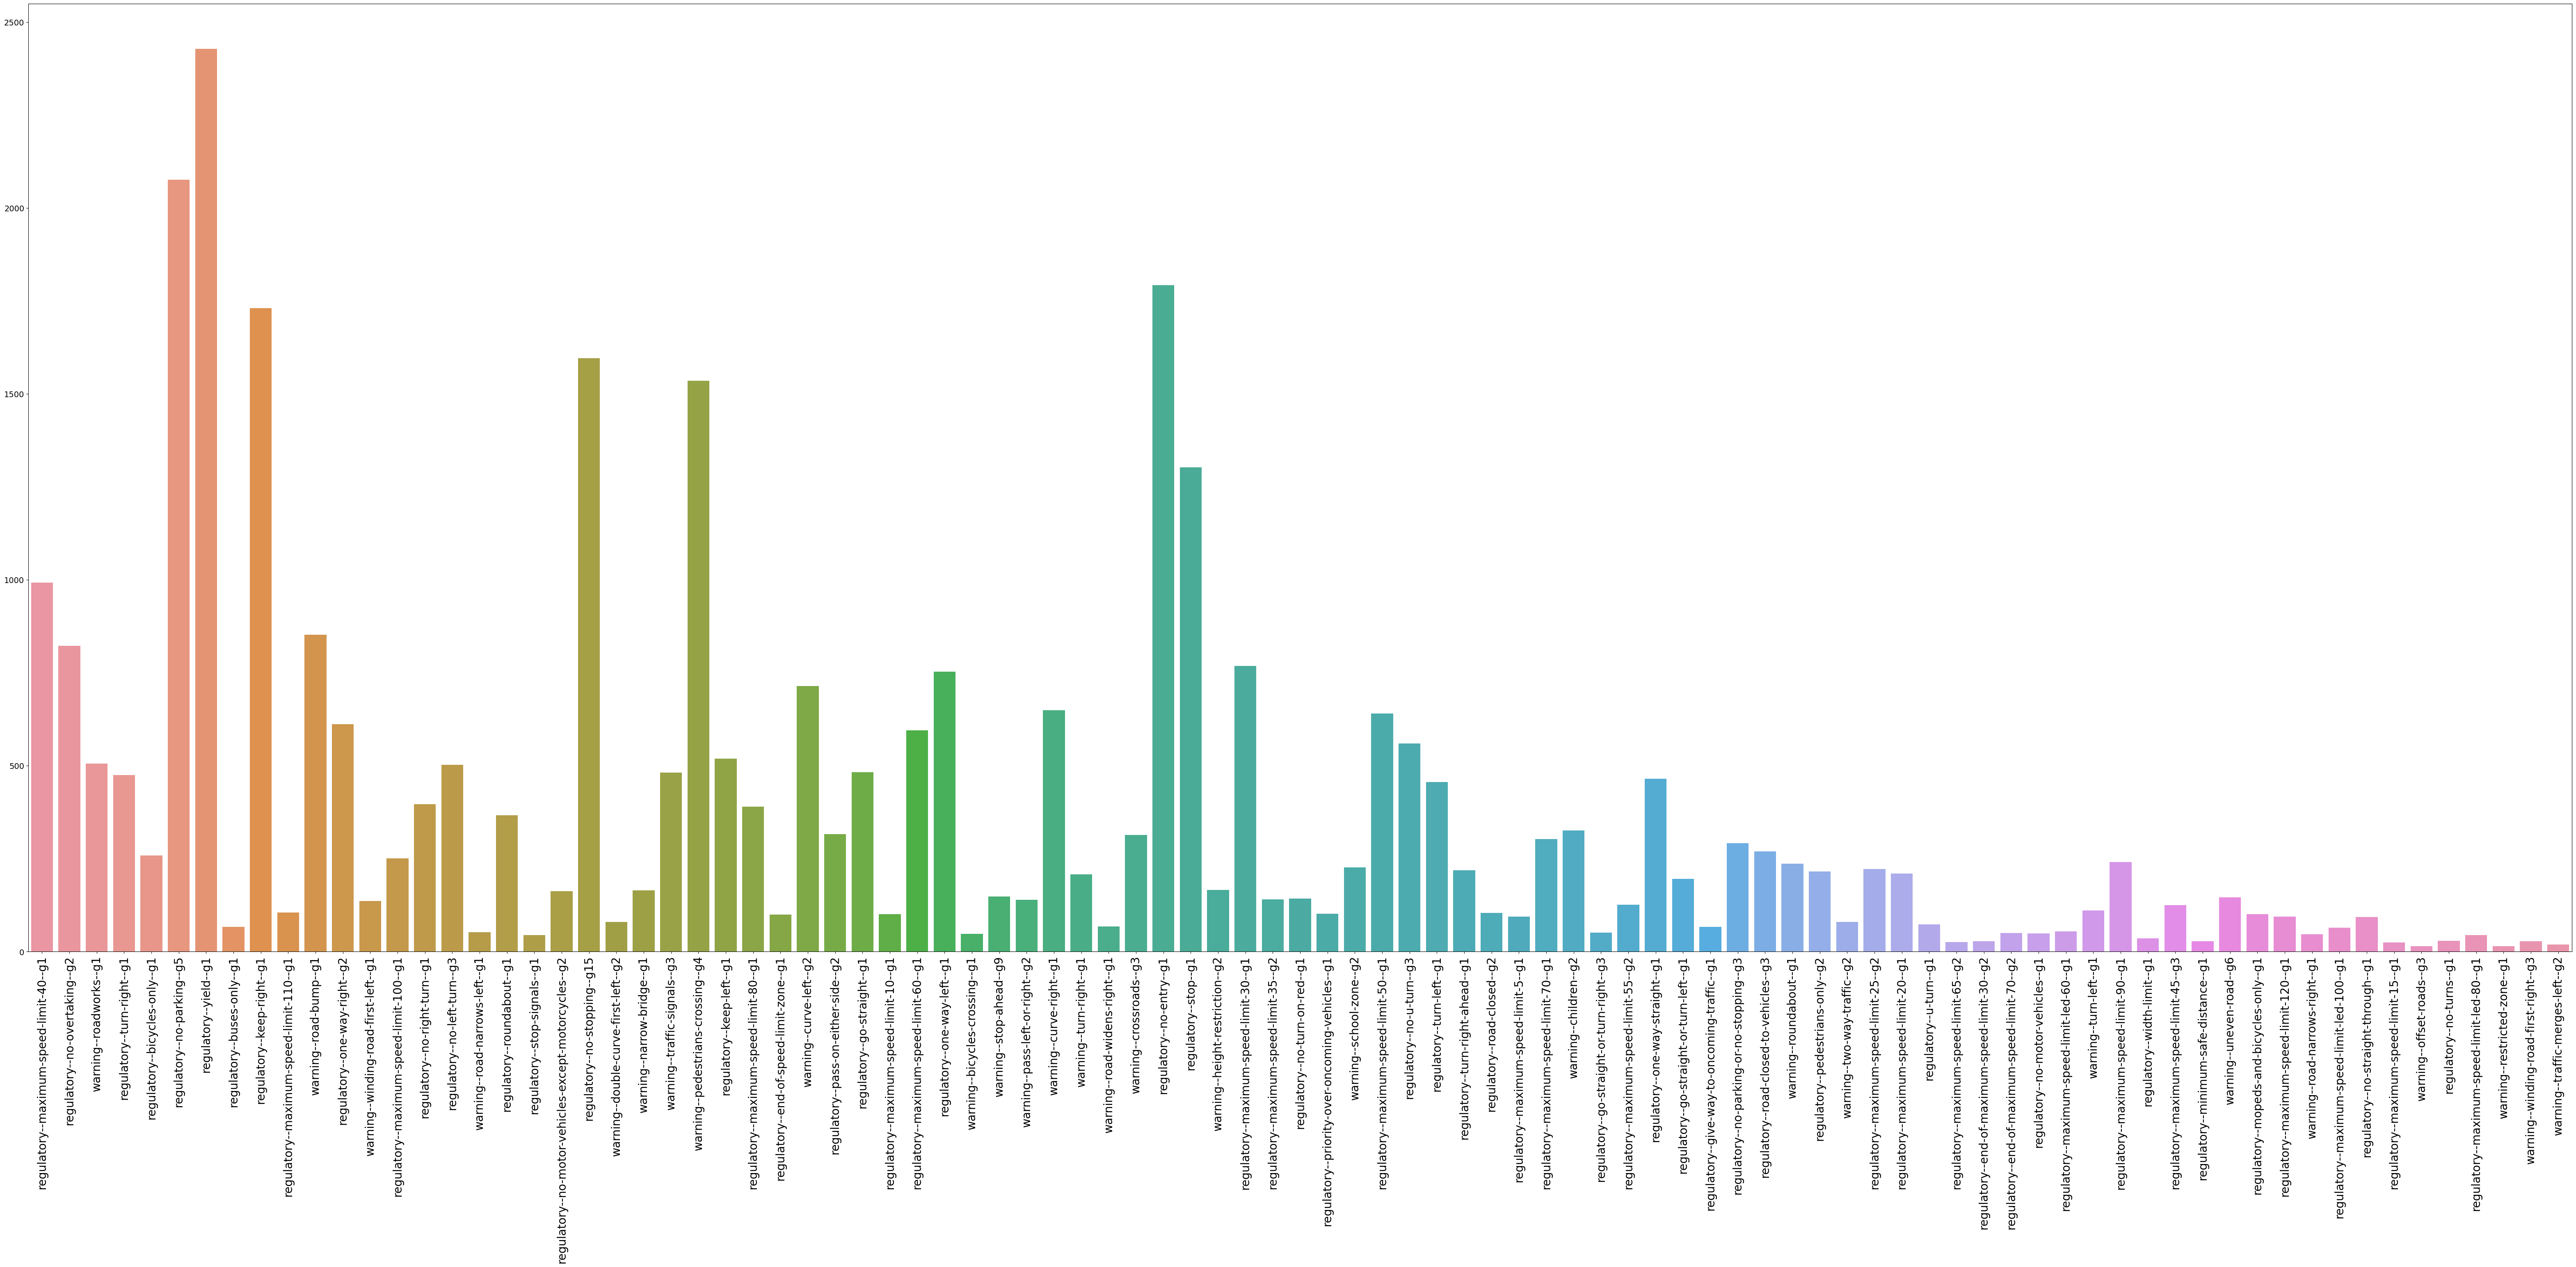

In [ ]:
Names = list(Labels_with_freq.keys())
Score = list(Labels_with_freq.values())
fig, ax = plt.subplots(figsize = (80,30))
sns.barplot(x = Names,y=Score, ax= ax)
plt.xticks(rotation='vertical', size = 20)
plt.show()

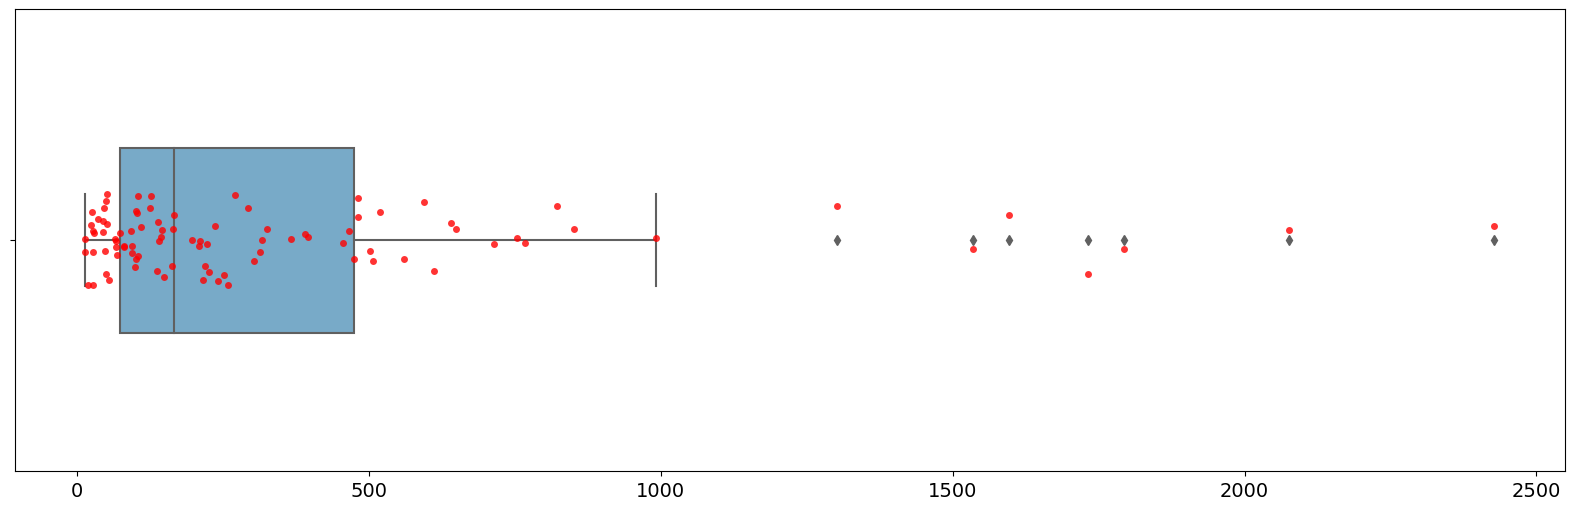

In [ ]:
# Creating boxplot
fig, ax = plt.subplots(figsize = (20,6))
sns.boxplot(x = Score,width = 0.4, ax = ax, palette= "Blues")
sns.color_palette("husl",1)
boxplot = sns.stripplot(x=Score,marker="o", alpha=0.8, color="red", s=5)

#Downloading YOLO requirements and repository

In [ ]:
os.chdir("/content")
#Unzipping Train files to Colab
with zipfile.ZipFile("/content/drive/MyDrive/RoadSignDataset/trainingdata.zip","r") as zip_ref:
  zip_ref.extractall()

In [ ]:
# Cloning the YOLOv5 Repository
while os.getcwd()!="/content":
  os.chdir("..")
os.chdir("/content/drive/MyDrive")
if os.path.exists("yolov5")==False:

    print("preparing to clone yolov5 repository")

    !git clone https://github.com/ultralytics/yolov5
    os.chdir("yolov5")
    #Installing Dependencies

    print("preparing to install dependencies")

In [ ]:
os.chdir("/content/drive/MyDrive/yolov5")
%pip install -r requirements.txt
os.chdir("..")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.9 MB/s eta 0:00:00


#Creating Yaml files for YOLO:

In [ ]:
#Defining Training Data
while os.getcwd()!="/content":
  os.chdir("..")
if os.path.exists("/content/drive/MyDrive/yolov5/data/custom1.yaml") == False:
  data = dict(
      names = class_list,
      nc = len(class_list),
      val = "Validation/images",
      test = "Test",
      train = "Train/images",
      path = "/content",
  )
  with open("custom1.yaml","w") as y:
    documents = yaml.dump(data,y)
  shutil.move("/content/custom1.yaml","/content/drive/MyDrive/yolov5/data") 

In [ ]:
# Initial Hyperparameters:

# lr0: 0.01  # initial learning rate (SGD=1E-2, Adam=1E-3)
# lrf: 0.01  # final OneCycleLR learning rate (lr0 * lrf)
# momentum: 0.937  # SGD momentum/Adam beta1
# weight_decay: 0.0005  # optimizer weight decay 5e-4
# warmup_epochs: 3.0  # warmup epochs (fractions ok)
# warmup_momentum: 0.8  # warmup initial momentum
# warmup_bias_lr: 0.1  # warmup initial bias lr
# box: 0.05  # box loss gain
# cls: 0.5  # cls loss gain
# cls_pw: 1.0  # cls BCELoss positive_weight
# obj: 1.0  # obj loss gain (scale with pixels)
# obj_pw: 1.0  # obj BCELoss positive_weight
# iou_t: 0.20  # IoU training threshold
# anchor_t: 4.0  # anchor-multiple threshold
# # anchors: 3  # anchors per output layer (0 to ignore)
# fl_gamma: 0.0  # focal loss gamma (efficientDet default gamma=1.5)
# hsv_h: 0.015  # image HSV-Hue augmentation (fraction)
# hsv_s: 0.7  # image HSV-Saturation augmentation (fraction)
# hsv_v: 0.4  # image HSV-Value augmentation (fraction)
# degrees: 0.0  # image rotation (+/- deg)
# translate: 0.1  # image translation (+/- fraction)
# scale: 0.5  # image scale (+/- gain)
# shear: 0.0  # image shear (+/- deg)
# perspective: 0.0  # image perspective (+/- fraction), range 0-0.001
# flipud: 0.0  # image flip up-down (probability)
# fliplr: 0.5  # image flip left-right (probability)
# mosaic: 1.0  # image mosaic (probability)
# mixup: 0.0  # image mixup (probability)
# copy_paste: 0.0  # segment copy-paste (probability)

In [ ]:
os.chdir("/content")
if os.path.exists("/content/drive/MyDrive/yolov5/data/hyps/custom_hyps.yaml") == True:
  os.remove("/content/drive/MyDrive/yolov5/data/hyps/custom_hyps.yaml")

#Creating Hyperparameters
# YOLOv5 🚀 by Ultralytics, GPL-3.0 license
# Hyperparameters for high-augmentation COCO training from scratch
# python train.py --batch 32 --cfg yolov5m6.yaml --weights '' --data coco.yaml --img 1280 --epochs 300
# See tutorials for hyperparameter evolution https://github.com/ultralytics/yolov5#tutorials
hyps = dict(
  lr0= 2.0, # initial learning rate (SGD=1E-2, Adam=1E-3) 
  lrf= 0.30942,  # final OneCycleLR learning rate (lr0 * lrf) 
  momentum=  0.7094, # SGD momentum/Adam beta1
  weight_decay= 0.0006,  # optimizer weight decay 5e-4
  warmup_epochs= 0.73911,  # warmup epochs (fractions ok)
  warmup_momentum= 0.54634,  # warmup initial momentum
  warmup_bias_lr= 0.10013,  # warmup initial bias lr
  box= 0.04824,  # box loss gain
  cls= 0.6227,  # cls loss gain
  cls_pw= 0.00082,  # cls BCELoss positive_weight
  obj= 0.68246,  # obj loss gain (scale with pixels)
  obj_pw= 0.41132,  # obj BCELoss positive_weight
  iou_t= 0.20,  # IoU training threshold
  anchor_t= 0.08354,  # anchor-multiple threshold
  # anchors: 3  # anchors per output layer (0 to ignore)
  fl_gamma= 0.0,  # focal loss gamma (efficientDet default gamma=1.5)
  hsv_h= 0.67214,  # image HSV-Hue augmentation (fraction)
  hsv_s= 0.46749,  # image HSV-Saturation augmentation (fraction)
  hsv_v= 0.59018,  # image HSV-Value augmentation (fraction)
  degrees= 0.0,  # image rotation (+/- deg)
  translate= 0.0677,  # image translation (+/- fraction)
  scale=  0.53864,  # image scale (+/- gain)
  shear= 0.0,  # image shear (+/- deg)
  perspective= 0.000,  # image perspective (+/- fraction), range 0-0.001
  flipud= 0.2, # image flip up-down (probability)
  fliplr= 0.2,  # image flip left-right (probability)
  mosaic= 1.0,  # image mosaic (probability)
  mixup= 0.09154,  # image mixup (probability)
  copy_paste= 0.04946,  # segment copy-paste (probability)
  )
with open("custom_hyps.yaml","w") as y:
  documents = yaml.dump(hyps,y)
shutil.move("/content/custom_hyps.yaml","/content/drive/MyDrive/yolov5/data/hyps")

'/content/drive/MyDrive/yolov5/data/hyps/custom_hyps.yaml'

#Training

In [ ]:
os.chdir("/content/drive/MyDrive/yolov5")
!python val.py --weights /content/drive/MyDrive/yolov5/runs/train/exp5/weights/last.pt --batch-size 32 --data custom1.yaml --name exp5

val: data=/content/drive/MyDrive/yolov5/data/custom1.yaml, weights=['/content/drive/MyDrive/yolov5/runs/train/exp5/weights/last.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp5, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-10-g10c025d Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
Model summary: 157 layers, 8091622 parameters, 0 gradients, 19.2 GFLOPs
val: Scanning /content/Validation/labels.cache... 5320 images, 12 backgrounds, 1 corrupt: 100% 5320/5320 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/Validation/images/mw82Ix9zLKMBsOBqASEiDQ.jpg: ignoring corrupt image/label: negative label values [    -0.9624]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 167/167 [02:15<00:00,  1.23it/s]
   

In [ ]:
os.chdir("/content/drive/MyDrive/yolov5")
!python train.py --weights yolov5l.pt --batch-size 32 --data custom1.yaml --img 768 --name hyptrain --epochs 150 --hyp /content/drive/MyDrive/yolov5/runs/evolve/evolved9/hyp_evolve.yaml

Traceback (most recent call last):
  File "<frozen importlib._bootstrap>", line 1007, in _find_and_load
  File "<frozen importlib._bootstrap>", line 986, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 680, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/usr/local/lib/python3.9/dist-packages/fsspec/__init__.py", line 64, in <module>
    process_entries()
  File "/usr/local/lib/python3.9/dist-packages/fsspec/__init__.py", line 43, in process_entries
    eps = entry_points()
  File "/usr/lib/python3.9/importlib/metadata.py", line 580, in entry_points
    ordered = sorted(eps, key=by_group)
  File "/usr/lib/python3.9/importlib/metadata.py", line 577, in <genexpr>
    eps = itertools.chain.from_iterable(
  File "/usr/lib/python3.9/importlib/metadata.py", line 466, in search
    or n_low.startswith(name.prefix)
KeyboardInterrupt

During 

In [ ]:
os.chdir("/content/drive/MyDrive/yolov5")
!python train.py --weights yolov5l.pt --batch-size 32 --data custom1.yaml --img 700 --name evolved --epochs 5 --hyp custom_hyps.yaml

2023-04-19 01:53:33.873350: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-19 01:53:34.961485: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=yolov5l.pt, cfg=, data=custom1.yaml, hyp=custom_hyps.yaml, epochs=5, batch_size=32, imgsz=700, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=evolved, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_

In [ ]:
os.chdir("/content/drive/MyDrive/yolov5")
!python train.py --weights yolov5l.pt --batch-size 32 --data custom1.yaml --img 768 --name hyptrain --epochs 150 --hyp /content/drive/MyDrive/yolov5/runs/evolve/evolved9/hyp_evolve.yaml --cache

Traceback (most recent call last):
  File "/content/drive/MyDrive/yolov5/train.py", line 29, in <module>
    import torch
  File "/usr/local/lib/python3.9/dist-packages/torch/__init__.py", line 229, in <module>
    from torch._C import *  # noqa: F403
KeyboardInterrupt
^C


In [ ]:
#Training using pre-trained model from YOLOV5 repository
while os.getcwd()!="/content":
  os.chdir("..")
os.chdir("/content/drive/MyDrive/yolov5")
!python train.py --data custom1.yaml --weights yolov5l.pt --batch-size 32 --hyp custom_hyps.yaml --epochs 100 --img 768  --name freqtwofifty

In [ ]:
os.chdir("/content/drive/MyDrive/yolov5")
!python train.py --resume /content/drive/MyDrive/yolov5/runs/train/objlsmtn2/weights/last.pt

In [ ]:
os.chdir("/content/drive/MyDrive/yolov5")

In [ ]:
os.chdir("/content/drive/MyDrive/yolov5")
#Validation
!python val.py --weights /content/drive/MyDrive/yolov5/runs/train/exp11_AfterCropping/weights/best.pt --data custom1.yaml --img 640

#Reading and interpreting training results

In [ ]:
print(os.getcwd())
os.chdir("/content")

/content


In [ ]:
#Reading results from Yolo csv file
results1 = pd.read_csv("/content/drive/MyDrive/yolov5/runs/train/exp/results.csv")
results2 = pd.read_csv("/content/drive/MyDrive/yolov5/runs/train/exp2/results.csv")
results3 = pd.read_csv("/content/drive/MyDrive/yolov5/runs/train/exp3/results.csv")
results4 = pd.read_csv("/content/drive/MyDrive/yolov5/runs/train/exp4/results.csv")
results5 = pd.read_csv("/content/drive/MyDrive/yolov5/runs/train/exp5/results.csv")

combined_df = pd.concat([results1,results2,results3,results4,results5])
combined_df.to_csv("combined_file.csv", index=False)
results = pd.read_csv("combined_file.csv")
print(len(results))

with open('combined_file.csv', 'r') as input_file:
    reader = csv.reader(input_file)
    
    # Create a new CSV file for the output
    with open('output.csv', 'w', newline='') as output_file:
        writer = csv.writer(output_file)
        

       # Iterate through the rows in the input file
        for i, row in enumerate(reader, start=-1):
            # Add the row number as the first column
            row.insert(0, i)
            # Write the modified row to the output file
            writer.writerow(row)
df = pd.read_csv("output.csv")
df.rename(columns={"-1": "Epoch_Number"}, inplace=True)
df.to_csv("results_initial.csv")

df = pd.read_csv('results_initial.csv')
os.remove("results_initial.csv")
# Remove the 2nd column (index 1)
df = df.drop(df.columns[2], axis=1)
# Write the DataFrame to a new CSV file
df.to_csv('results_initial1.csv', index=False)


1420


In [ ]:

# Define the epoch number and mAP columns
epoch_col = "Epoch_Number"
map_col = "     metrics/mAP_0.5"

# Function to find the mAP score for a given epoch number
def find_map_score(epoch_num):
    # Find the row with the given epoch number
    row = df.loc[df[epoch_col] == epoch_num]
    # Get the mAP score from the row
    map_score = row[map_col].iloc[0]
    return map_score

# Example usage
epoch_num = 10
map_score = find_map_score(epoch_num)
print(f"mAP score for epoch {epoch_num}: {map_score}")
find_map_score(800)

mAP score for epoch 10: 0.025081


0.22708

In [ ]:
df.columns

Index(['               epoch', '      train/box_loss', '      train/obj_loss',
       '      train/cls_loss', '   metrics/precision', '      metrics/recall',
       '     metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', '        val/box_loss',
       '        val/obj_loss', '        val/cls_loss', '               x/lr0',
       '               x/lr1', '               x/lr2'],
      dtype='object')

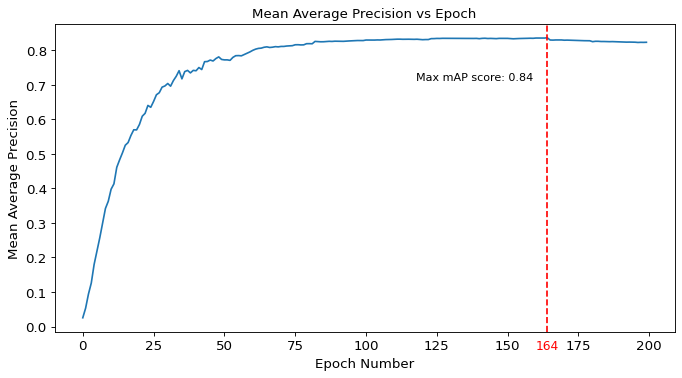

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/yolov5/runs/train/exp11_AfterCropping/results.csv")
# Find the maximum F1 score and its corresponding epoch
max_mAP_score = df["     metrics/mAP_0.5"].max()
max_mAP_score_epoch = df.loc[df["     metrics/mAP_0.5"] == max_mAP_score, '               epoch'].iloc[0]

# Create a plot of F1 score vs epoch
plt.figure(figsize=(10, 5), dpi=80)
plt.plot(df['               epoch'], df["     metrics/mAP_0.5"])
plt.axvline(x=max_mAP_score_epoch, color="r", linestyle="--")
plt.xlabel("Epoch Number",fontsize = 12)
plt.ylabel("Mean Average Precision",fontsize = 12)
plt.title("Mean Average Precision vs Epoch")

# Get the x and y coordinates of the line for the maximum mAP score
line_x = plt.gca().lines[-2].get_xdata()
line_y = plt.gca().lines[-2].get_ydata()

# Get the index of the midpoint of the line
mid_idx = np.argmax(line_y)

# Get the x and y coordinates of the midpoint
mid_x = line_x[mid_idx]
mid_y = line_y[mid_idx]

# Move the text label downwards by a given value
label_offset= 0.1
plt.text(mid_x-5, mid_y-label_offset, f"Max mAP score: {max_mAP_score:.2f}",ha="right", va='top')
plt.text(mid_x,-0.065 , max_mAP_score_epoch,fontsize = 11,color = "r",ha="center")
plt.show()

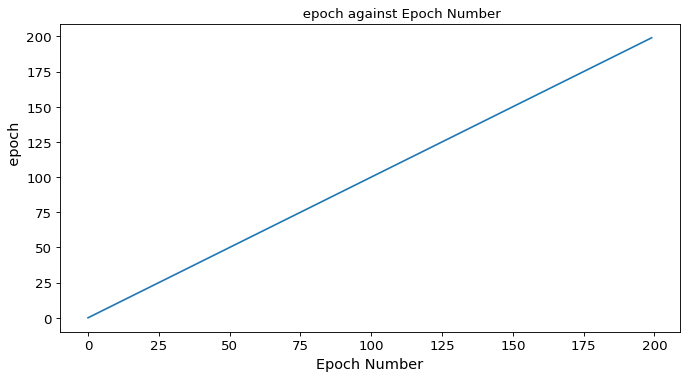

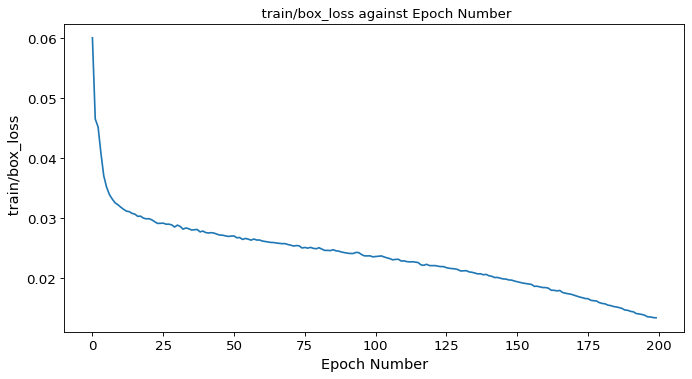

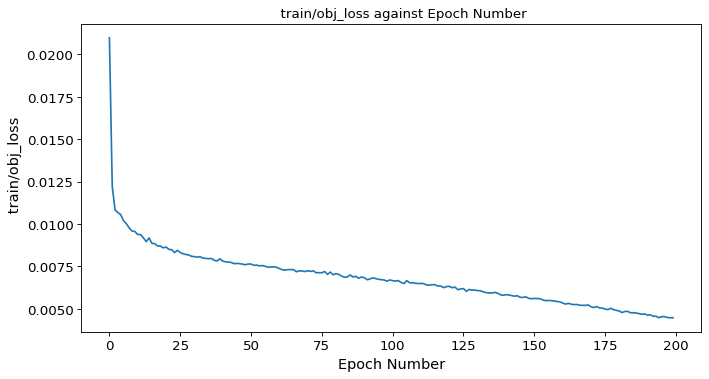

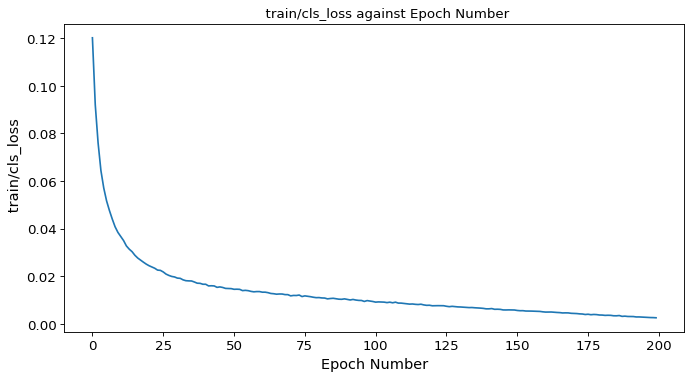

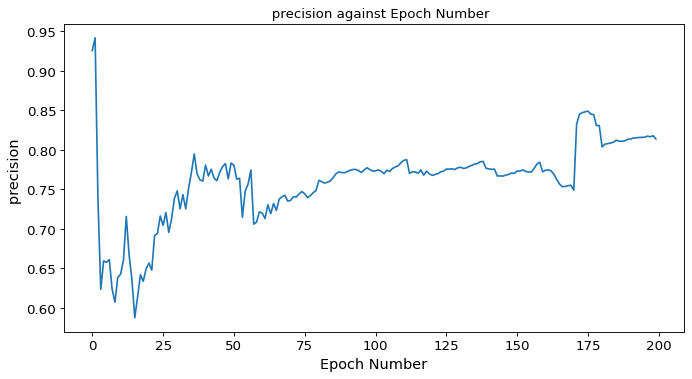

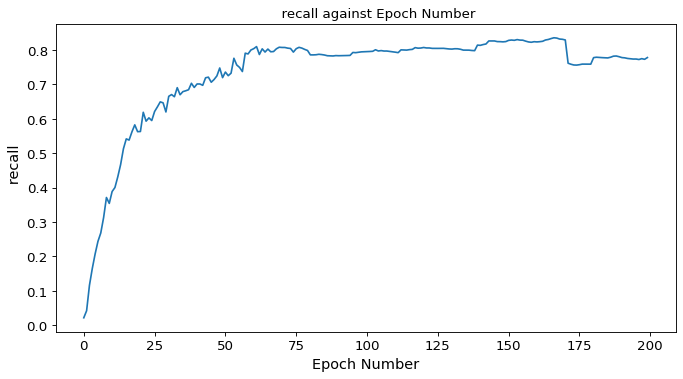

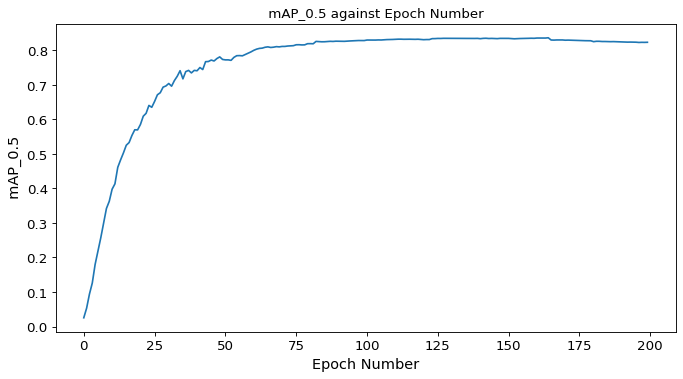

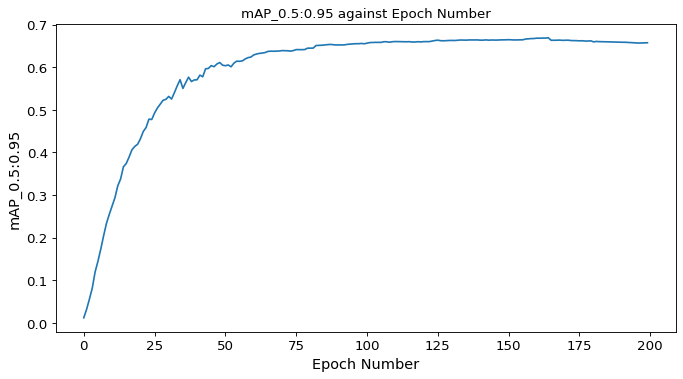

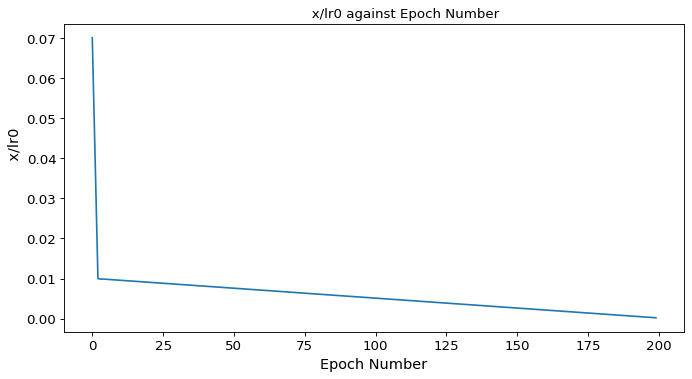

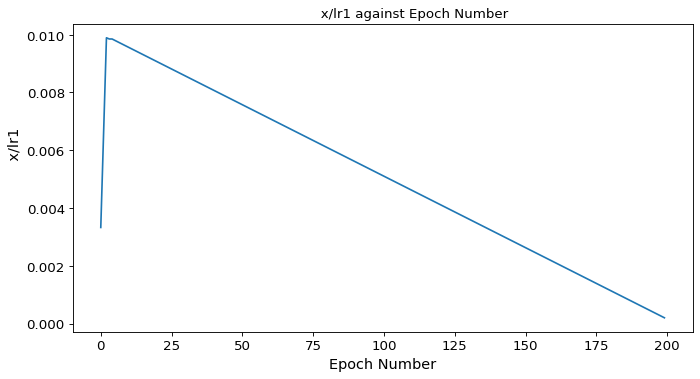

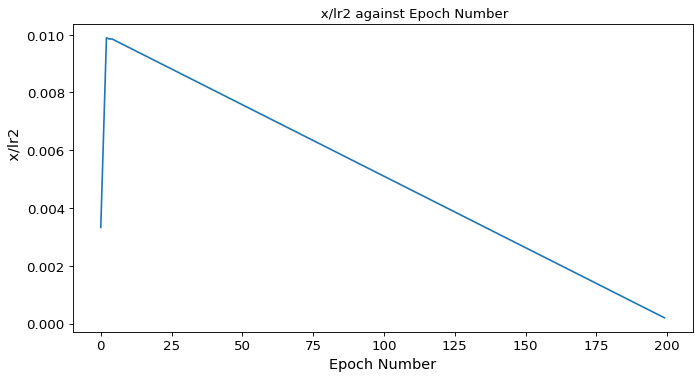

In [ ]:

# Define the epoch number column
epoch_col = '               epoch'

# Get a list of all column names that contain the "metrics/" string
y_cols = [col for col in df.columns if 'val' not in col]

# Create individual plots for each column
for col in y_cols:
  # Remove the "metrics/" string from the column name
  y_label = col.replace('metrics/', '')

  X = df[epoch_col]
  Y = df[col]

  plt.figure(figsize=(10,5), dpi=80)
  plt.xlabel("Epoch Number", fontsize=13)
  plt.ylabel(y_label, fontsize=13)
  plt.rc('xtick', labelsize=12)
  plt.rc('ytick', labelsize=12)
  plt.plot(X, Y)
  plt.title(f"{y_label} against Epoch Number")
  plt.show()

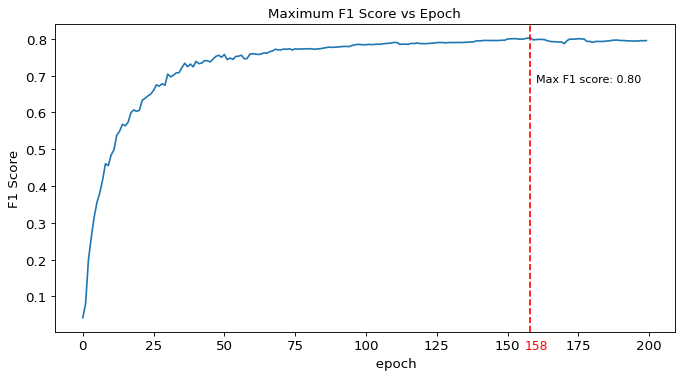

0.802835358807895


In [ ]:
# Define columns for precision and recall
precision_col = "   metrics/precision"
recall_col = "      metrics/recall"


# Calculate F1 score and add it as a new column to the DataFrame
df["f1_score"] = 2 * ((df[precision_col] * df[recall_col]) / (df[precision_col] + df[recall_col]))

# Find the maximum F1 score and its corresponding epoch
max_f1_score = df["f1_score"].max()
max_f1_score_epoch = df.loc[df["f1_score"] == max_f1_score, '               epoch'].iloc[0]

# Create a plot of F1 score vs epoch
plt.figure(figsize=(10, 5), dpi=80)
plt.plot(df['               epoch'], df["f1_score"])
plt.axvline(x=max_f1_score_epoch, color="r", linestyle="--")
plt.xlabel('               epoch',fontsize = 12)
plt.ylabel("F1 Score",fontsize = 12)
plt.title("Maximum F1 Score vs Epoch")

# Get the x and y coordinates of the line for the maximum F1 score
line_x = plt.gca().lines[-2].get_xdata()
line_y = plt.gca().lines[-2].get_ydata()

# Get the index of the midpoint of the line
mid_idx = np.argmax(line_y)

# Get the x and y coordinates of the midpoint
mid_x = line_x[mid_idx]
mid_y = line_y[mid_idx]

# Move the text label downwards by a given value
label_offset = 0.1
plt.text(mid_x+2, mid_y - label_offset, f"Max F1 score: {max_f1_score:.2f}", va='top')
plt.text(mid_x+2, -0.042, max_f1_score_epoch,fontsize = 11,color = "r",ha= "center")
plt.show()
print(max_f1_score)

In [ ]:
#Plotting epoch number vs mAP
X= df['Epoch_Number']
Y= df["     metrics/mAP_0.5"]
print(max(Y))
plt.figure(figsize=(10,5),dpi=80)
plt.xlabel("Epoch Number",fontsize=13)
plt.ylabel("Mean Average Precision",fontsize=13)
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
plt.plot(X,Y)
plt.show

Unnamed: 0
Epoch_Number
      train/box_loss
      train/obj_loss
      train/cls_loss
   metrics/precision
      metrics/recall
     metrics/mAP_0.5
metrics/mAP_0.5:0.95
        val/box_loss
        val/obj_loss
        val/cls_loss
               x/lr0
               x/lr1
               x/lr2


0.67383


<function matplotlib.pyplot.show(close=None, block=None)>

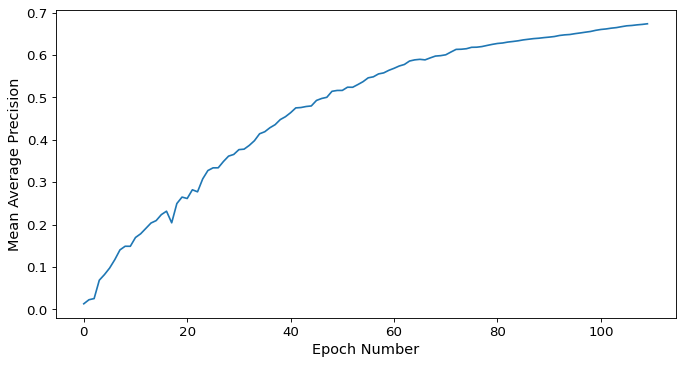

In [ ]:
#Plotting epoch number vs mAP
df = pd.read_csv("/content/drive/MyDrive/yolov5/runs/train/exp8/results.csv")
X= df["               epoch"]
Y= df["     metrics/mAP_0.5"]
print(max(Y))
plt.figure(figsize=(10,5),dpi=80)
plt.xlabel("Epoch Number",fontsize=13)
plt.ylabel("Mean Average Precision",fontsize=13)
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
plt.plot(X,Y)
plt.show

Hyperparameter evolution plots

In [ ]:
# Read the csv file into a pandas dataframe
df = pd.read_csv("/content/drive/MyDrive/yolov5/runs/evolve/evolved9/results.csv")

# Add a generation number column based on the epoch number
df['Generation_Number'] = (df.index // 10) + 1
# Remove any zero data from the 5th column
df = df[df.iloc[:, 4] != 0]

# Create individual plots for each column of the 15th column against the 5:11th column
cols_to_plot = list(df.columns[1:12])
x_col = df.columns[14]

for col in cols_to_plot:
  if df[col].any():
    plt.figure(figsize=(8, 6), dpi=80)
    plt.plot(df.iloc[:, 14], df[col])
    plt.xlabel(x_col)
    col = col.replace("metrics/","").replace("train/","")
    plt.ylabel(col)
    plt.title(f"{col} vs {x_col}",fontsize = 14)
    plt.show()

In [ ]:
#Plotting epoch number vs mAP
df = pd.read_csv("/content/drive/MyDrive/yolov5/runs/train/exp8/results.csv")
X= df["               epoch"]
Y= df["     metrics/mAP_0.5"]
print(max(Y))
plt.figure(figsize=(10,5),dpi=80)
plt.xlabel("Epoch Number",fontsize=13)
plt.ylabel("Mean Average Precision",fontsize=13)
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
plt.plot(X,Y)
plt.show



1.   Find minimum frequency of class distribution
2.   Vary class cutoff within the range 150 - 350
3.   Cropping algorithms for traing on manual driving dataset
4.   Push 640 resize limit up (find minimum image size)
5.   Manually resize
6.   Set minimum bound on max dimensions in pixels

#Testing on Partially Annotated Dataset

In [ ]:
os.mkdir("/content/Test/labels")
os.mkdir("/content/Test/jsonlabels")

In [ ]:
#Moving Testing labels into respective folder
os.chdir("/content/Test/images")
for i in os.listdir():
  shutil.copy("/content/Test/mtsd_v2_partially_annotated/annotations/"+ i.replace(".jpg",".json"),"/content/Test/jsonlabels")

In [ ]:
#Writing Class list yaml file- same as labelstring list made previously had to include this step to move list from VS to Colab:
with open("/content/drive/MyDrive/RoadSignDataset/mtsd_v2_fully_annotated GREEN/labelclasses.txt") as f:
  class_list = f.readlines()
  class_list = [x.strip() for x in class_list]
print(class_list)

In [ ]:
# shutil.rmtree("/content/Test")

In [ ]:
def labelwrite(path_to_img,dest_path):
  os.chdir(path_to_img)
  for file in os.listdir():
    # print("current file ="+ file)
    with open(file, "r") as j:
      data = json.load(j)
      w = open(str(file).replace("json","txt"), "w")
      w.write("")
      w.close
      for instance in range(0,len(data["objects"])):
        with open(str(file).replace("json","txt"),"a") as t:
          x= ((float(data["objects"][instance]["bbox"]["xmax"])+float(data["objects"][instance]["bbox"]["xmin"]))/2)/float(data["width"])
          y= ((float(data["objects"][instance]["bbox"]["ymax"])+float(data["objects"][instance]["bbox"]["ymin"]))/2)/float(data["height"])
          width= (float(data["objects"][instance]["bbox"]["xmax"])-float(data["objects"][instance]["bbox"]["xmin"]))/float(data["width"])
          height= (float(data["objects"][instance]["bbox"]["ymax"])-float(data["objects"][instance]["bbox"]["ymin"]))/float(data["height"])

          t.write(str(class_list.index(data["objects"][instance]["label"]))+" "+ str(x) + " "+ str(y) + " " + str(width) + " " + str(height) +"\n")
    shutil.move(str(file).replace("json","txt"),dest_path)

In [ ]:
labelwrite("/content/Test/jsonlabels","/content/Test/labels")

In [ ]:
os.chdir("/content/Test/labels")
# Checking how many images were removed
Original_Size = len(os.listdir())
for filename in os.listdir():
  with open(str(filename),"r") as file:
    with open("temp.txt","w") as output:
      for line in file:
        word_split = line.split()
        if int(word_split[0]) not in unusedclasslist:
          output.write(line)
  os.replace("temp.txt",str(filename))
  if os.path.getsize(str(filename)) ==0:
    os.remove(str(filename))
Updated_Size = len(os.listdir())
print("Number of files removed = {}".format(int(Original_Size-Updated_Size)))

In [ ]:
#Removing all unlabelled training images
os.chdir("/content/Test/images")
numberofremovedimages = 0
for image in os.listdir():
  os.chdir("/content/Test/labels")
  if os.path.exists(str(image).replace(".jpg",".txt")) ==False:
    os.chdir("/content/Test/images")
    os.remove(image)
    numberofremovedimages +=1
  else:
    os.chdir("/content/Test/images")
print(numberofremovedimages)

In [ ]:
# shutil.move("/content/Test/images/5TTRQQ_FF_6j2b2P425Jmw.jpg","/content/drive/MyDrive/RoadSignDataset/Workspace")
# shutil.move("/content/Test/labels/5TTRQQ_FF_6j2b2P425Jmw.txt","/content/drive/MyDrive/RoadSignDataset/Workspace")

In [ ]:
os.remove("/content/Test/labels/5TTRQQ_FF_6j2b2P425Jmw.txt")
os.remove("/content/Test/images/5TTRQQ_FF_6j2b2P425Jmw.jpg")

FileNotFoundError: ignored

In [ ]:
crop_img("/content/Test/images")

NameError: ignored

In [ ]:
test_crop_height,test_crop_width,test_crop_Area = get_img_size("/content/Test/images")

NameError: ignored

In [ ]:
#Finding size for scaling:
quantile_num = 0.2
print(str(quantile_num) + " quantile of image height: {}".format(np.quantile(test_crop_height, quantile_num)))
print(str(quantile_num) +" quantile of image width: {}".format(np.quantile(test_crop_width, quantile_num)))
print("Standard Deviation of image width: {}".format(np.std(test_crop_width)))
print("Standard Deviation of image height: {}".format(np.std(test_crop_height)))
print("Standard Deviation of image area: {}".format(np.std(test_crop_Area)))
X = test_crop_height
Y = test_crop_width
columns = ["Height","Width"]
# Creating Boxplot of Height and Width

# Creating a pandas dataframe to allow multiple boxplots on one figure
df = pd.DataFrame(list(zip(X,Y)),columns = columns)

fig, ax = plt.subplots(figsize = (20,6))
sns.boxplot(data = df, width = 0.4, ax = ax, palette= "Blues")
sns.color_palette("husl",1)
# boxplot = sns.stripplot(data= df, marker="o", alpha=0.1, color="red", s=5)

In [ ]:
testiterationname = "Single_img3"

In [ ]:
#Detecting on test dataset
os.chdir("/content/drive/MyDrive/yolov5")
# !python detect.py --weights /content/drive/MyDrive/yolov5/runs/train/exp11_AfterCropping/weights/best.pt --source /content/Test/images --img 672 --save-txt --save-conf --name testiterationname --conf-thres 0.6
!python detect.py --weights /content/drive/MyDrive/yolov5/runs/train/exp11_AfterCropping/weights/best.pt --source /content/Test/images/F-PDQoCKynKS6bOfQKpYJA.jpg --img 500 --nosave

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/exp11_AfterCropping/weights/best.pt'], source=/content/Test/images/F-PDQoCKynKS6bOfQKpYJA.jpg, data=data/coco128.yaml, imgsz=[500, 500], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=True, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-10-g10c025d Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
Model summary: 212 layers, 22469334 parameters, 0 gradients, 53.0 GFLOPs
WARNING ⚠️ --img-size [500, 500] must be multiple of max stride 32, updating to [512, 512]
image 1/1 /content/Test/images/F-PDQoCKynKS6bOfQKpYJA.jpg: 320x512 (no detections), 86.2ms
Speed: 0.5ms pre-process, 86.2ms inference, 0.5ms NMS per image at shape (1, 3,

In [ ]:
#Testing code on Custom Images
os.chdir("/content/drive/MyDrive/yolov5")
Path_to_img = "/content/Stop_blocked.png"
!python detect.py --weights /content/drive/MyDrive/yolov5/runs/train/exp11_AfterCropping/weights/best.pt --source /content/Snow_StopSign.jpeg --img 412 --save-txt --name "Stop_Blocked_Snow"

In [ ]:
import torch
import cv2
import numpy as np
import pyttsx3
import pandas as pd
import time

# Load the PyTorch model
model = torch.hub.load('ultralytics/yolov5', 'custom', path= "/content/best.pt")
model.eval()
previous_label = None
frame_count = 0
# Initialize the text to speech engine
engine = pyttsx3.init()

# Define the function to make predictions and narrate the results
def predict(frame):
    global previous_label, frame_count
    resized_frame = cv2.resize(frame,(1248,1248))
    # Resize the frame to match the input size of the model
    results = model(frame)
    #Creates a pandas dataframe that stores all predictions, confidences and locations for bounding box
    df = results.pandas().xyxy[0]

    # Get the label of the predicted class
    labels = {1: 'regulatory--keep-right--g1',
        2: 'regulatory--priority-over-oncoming-vehicles--g1',
        4: 'regulatory--maximum-speed-limit-35--g2',
        6: 'warning--curve-left--g2',
        9: 'warning--pedestrians-crossing--g4',
        12: 'regulatory--maximum-speed-limit-45--g3',
        14: 'regulatory--one-way-right--g2',
        15: 'regulatory--yield--g1',
        16: 'regulatory--one-way-straight--g1',
        17: 'warning--curve-right--g1',
        18: 'regulatory--pedestrians-only--g2',
        20: 'regulatory--no-entry--g1',
        23: 'warning--crossroads--g3',
        26: 'regulatory--no-stopping--g15',
        38: 'regulatory--no-overtaking--g2',
        41: 'regulatory--stop--g1',
        43: 'regulatory--maximum-speed-limit-30--g1',
        48: 'regulatory--end-of-maximum-speed-limit-30--g2',
        52: 'warning--height-restriction--g2',
        54: 'warning--double-curve-first-left--g2',
        58: 'regulatory--turn-right--g1',
        60: 'regulatory--turn-left--g1',
        61: 'regulatory--no-parking-or-no-stopping--g3',
        62: 'warning--roundabout--g1',
        64: 'regulatory--maximqum-speed-limit-60--g1',
        66: 'regulatory--maximum-speed-limit-40--g1',
        69: 'warning--road-bump--g1',
        70: 'warning--uneven-road--g6',
        71: 'regulatory--maximum-speed-limit-50--g1',
        72: 'regulatory--no-parking--g5',
        76: 'regulatory--maximum-speed-limit-100--g1',
        78: 'regulatory--maximum-speed-limit-5--g1',
        81: 'warning--children--g2',
        83: 'regulatory--no-u-turn--g3',
        87: 'regulatory--go-straight-or-turn-left--g1',
        88: 'regulatory--bicycles-only--g1',
        90: 'regulatory--one-way-left--g1',
        93: 'regulatory--give-way-to-oncoming-traffic--g1',
        97: 'warning--narrow-bridge--g1',
        98: 'regulatory--turn-right-ahead--g1',
        100: 'regulatory--maximum-speed-limit-70--g1',
        103: 'regulatory--pass-on-either-side--g2',
        111: 'regulatory--u-turn--g1',
        112: 'regulatory--keep-left--g1',
        113: 'regulatory--go-straight--g1',
        118: 'regulatory--road-closed-to-vehicles--g3',
        119: 'regulatory--no-left-turn--g3',
        122: 'regulatory--no-right-turn--g1',
        129: 'regulatory--maximum-speed-limit-90--g1',
        130: 'regulatory--maximum-speed-limit-110--g1',
        136: 'warning--winding-road-first-left--g1',
        137: 'warning--turn-right--g1',
        144: 'warning--traffic-signals--g3',
        149: 'warning--winding-road-first-right--g3',
        154: 'regulatory--maximum-speed-limit-20--g1',
        155: 'regulatory--maximum-speed-limit-25--g2',
        156: 'regulatory--no-motor-vehicles-except-motorcycles--g2',
        172: 'regulatory--maximum-speed-limit-55--g2',
        175: 'warning--pass-left-or-right--g2',
        180: 'regulatory--maximum-speed-limit-80--g1',
        183: 'warning--roadworks--g1',
        193: 'regulatory--road-closed--g2',
        197: 'warning--school-zone--g2',
        211: 'regulatory--no-turn-on-red--g1',
        213: 'warning--road-narrows-right--g1',
        225: 'regulatory--maximum-speed-limit-led-100--g1',
        227: 'regulatory--maximum-speed-limit-10--g1',
        233: 'regulatory--roundabout--g1',
        236: 'warning--bicycles-crossing--g1',
        241: 'warning--turn-left--g1',
        243: 'warning--stop-ahead--g9',
        244: 'regulatory--mopeds-and-bicycles-only--g1',
        245: 'regulatory--end-of-speed-limit-zone--g1',
        256: 'regulatory--no-motor-vehicles--g1',
        262: 'regulatory--no-straight-through--g1',
        264: 'warning--offset-roads--g3',
        265: 'regulatory--maximum-speed-limit-120--g1',
        266: 'regulatory--go-straight-or-turn-right--g3',
        271: 'regulatory--buses-only--g1',
        283: 'regulatory--maximum-speed-limit-led-80--g1',
        291: 'warning--road-widens-right--g1',
        299: 'regulatory--end-of-maximum-speed-limit-70--g2',
        300: 'warning--traffic-merges-left--g2',
        307: 'regulatory--minimum-safe-distance--g1',
        314: 'regulatory--stop-signals--g1',
        320: 'regulatory--width-limit--g1',
        326: 'regulatory--no-turns--g1',
        327: 'regulatory--maximum-speed-limit-15--g1',
        329: 'regulatory--maximum-speed-limit-led-60--g1',
        337: 'warning--two-way-traffic--g2',
        357: 'warning--road-narrows-left--g1',
        363: 'regulatory--maximum-speed-limit-65--g2',
        392: 'warning--restricted-zone--g1'}
    #Reads all valid predictions
    if pd.api.types.is_numeric_dtype(df["class"]):
        if (df["class"]% 1 ==0).all():

            #Stores all classes and their confidences to find the prediction with the maximum confidence
            confidences = []
            for i in df["confidence"]:
                confidences.append(float(i))
                max_conf = max(confidences)

            #Applies a threshold for the maximum confidence 
            if max_conf >=0.7:

                # Formates the best prediction a string compativle with the text-to-speech engine
                current_prediction =df.loc[df['confidence'] == max_conf,'class'].values[0]
                text = labels[int(current_prediction)]
                text = text.split("--")
                text = str("{} Sign Detected".format(text[1]))

                #Checks if the best prediction has been read in the last 20 frames (10 seconds)
                if text == previous_label:
                    frame_count += 1
                else:
                    previous_label = text
                    frame_count = 0
                if frame_count >= 20:
                    frame_count = 0
                
                #Narrates the best prediction
                if frame_count == 0:
                    engine.say(text)
                    engine.runAndWait()
            
# Initialize the video capture device
cap = cv2.VideoCapture(0)
fps = int(cap.get(cv2.CAP_PROP_FPS))
width= int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height= int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

writer= cv2.VideoWriter('basicvideo.mp4', cv2.VideoWriter_fourcc(*'DIVX'), 20, (width,height))
# Loop over the frames from the video capture device
numberofframes = 0
start = time.time()
while True:
    
    # Read a frame from the video capture device
    numberofframes += 1
    ret, frame = cap.read()

    # Check if the frame was successfully read
    if not ret:
        break

    # Display the frame
    cv2.imshow("frame", frame)
    # Make a prediction and narrate the results

    predict(frame)
    # Check if the user has pressed the "q" key to quit
    if cv2.waitKey(1) == ord("q"):
        break
# Release the video capture device and close the window
cap.release()
cv2.destroyAllWindows()

duration = time.time() -start
print(duration)
framerate = numberofframes// duration
print("Framerate: ",framerate)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-4-15 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 


requirements: /root/.cache/torch/hub/requirements.txt not found, check failed.


Model summary: 212 layers, 22469334 parameters, 0 gradients, 53.0 GFLOPs
Adding AutoShape... 


0.0002315044403076172
Framerate:  4319.0


In [ ]:
shutil.copy("/content/drive/MyDrive/yolov5/runs/train/exp11_AfterCropping/weights/best.pt","/content/best.pt")

'/content/best.pt'

In [ ]:
!sudo apt install espeak

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  espeak-data libespeak1 libportaudio2 libsonic0
The following NEW packages will be installed:
  espeak espeak-data libespeak1 libportaudio2 libsonic0
0 upgraded, 5 newly installed, 0 to remove and 24 not upgraded.
Need to get 1,220 kB of archives.
After this operation, 3,060 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 libportaudio2 amd64 19.6.0-1build1 [65.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libsonic0 amd64 0.2.0-8 [13.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 espeak-data amd64 1.48.04+dfsg-8build1 [932 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/universe amd64 libespeak1 amd64 1.48.04+dfsg-8build1 [147 kB]
Get:5 http://archive.ubuntu.com/ubuntu focal/universe amd64 espeak amd64 1.48.04+dfsg-8build1 [61.8 kB]
Fetched 1,220 kB i

# Analysis of Results

---
---
Creating Confusion Matrix

---
---

In [ ]:
#Defining Row and Column names for a tempoary row column name variable which
# will make mapping labels easier

confusionmatrix_rowcolumn_list = ["Background"]
final_confusionmatrix_rowcolum_list = ["Background"]
for i in name_key_dict:
  confusionmatrix_rowcolumn_list.append(i)
  
#Defining final row and column names. This will replace the temporary values once
# all values in the matrix have been filled
for i in name_key_dict:
  name = str(name_key_dict[i]+"("+str(i)+")")
  final_confusionmatrix_rowcolum_list.append(name)

os.chdir("/content/Test/labels")

df = pd.DataFrame(columns = confusionmatrix_rowcolumn_list,index = confusionmatrix_rowcolumn_list)
df.fillna(0, inplace = True)
df
#The x axis is actual predictions, the y axis is predicted positive

Background  4  6  9  12  14  15  16  18  20  ...  307  314  320  \
Background           0  0  0  0   0   0   0   0   0   0  ...    0    0    0   
4                    0  0  0  0   0   0   0   0   0   0  ...    0    0    0   
6                    0  0  0  0   0   0   0   0   0   0  ...    0    0    0   
9                    0  0  0  0   0   0   0   0   0   0  ...    0    0    0   
12                   0  0  0  0   0   0   0   0   0   0  ...    0    0    0   
...                ... .. .. ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...   
329                  0  0  0  0   0   0   0   0   0   0  ...    0    0    0   
337                  0  0  0  0   0   0   0   0   0   0  ...    0    0    0   
357                  0  0  0  0   0   0   0   0   0   0  ...    0    0    0   
363                  0  0  0  0   0   0   0   0   0   0  ...    0    0    0   
392                  0  0  0  0   0   0   0   0   0   0  ...    0    0    0   

            326  327  329  337  357  363  392  
Background    0    0    0    0    0    0    0  
4             0    0    0    0    0    0    0  
6             0    0    0    0    0    0    0  
9             0    0    0    0    0    0    0  
12            0    0    0    0    0    0    0  
...         ...  ...  ...  ...  ...  ...  ...  
329           0    0    0    0    0    0    0  
337           0    0    0    0    0    0    0  
357           0    0    0    0    0    0    0  
363           0    0    0    0    0    0    0  
392           0    0    0    0    0    0    0  

[76 rows x 76 columns]

In [ ]:
def have_common_elements(list1, list2):
    common_elements = list(set(list1) & set(list2))
    return common_elements


In [ ]:
#Populating confusion matrix
number_of_exceptions = 0
#Iterating over all files in Test/labels Directory
for file in os.listdir("/content/Test/labels"):
  actualclasspredictions = []
  predictedclasses = []
  number_of_exceptions = 0
  insertedintomatrix = []
  testiterationname = "Large_test_withcrop"
  #Opens each label .txt file and reads it
  with open(file,"r") as actual:
    #checks if associated .txt file exists in the detected folder and if so, reads it too
    if os.path.exists("/content/drive/MyDrive/yolov5/runs/detect/"+testiterationname+"/labels/"+file) == True:

      with open("/content/drive/MyDrive/yolov5/runs/detect/"+testiterationname+"/labels/"+file) as predicted:
        #Parsing actual and predicted annotations
        for line in actual:
          word_split = line.split()
          actualclasspredictions.append(int(word_split[0]))

        for line in predicted:
          word_split = line.split()
          predictedclasses.append(int(word_split[0]))
        #Ensures there are no repeated elements, this can occur from poor IOU Thresholding but should be ignored
        predictedclasses = set(predictedclasses)
        actualclasspredictions = set(actualclasspredictions)
        correct_predictions = have_common_elements(predictedclasses,actualclasspredictions)
        #Checks for any correct predictions
        if bool(correct_predictions):
          for i in correct_predictions:
            df.loc[i,i] += 1
            insertedintomatrix.append(i)
            #Removes classes to ensure they are not checked again
            actualclasspredictions.remove(i)
            predictedclasses.remove(i)
        
        wrongpredictions = [x for x in predictedclasses if x not in actualclasspredictions]
        missedpredictions = [x for x in actualclasspredictions if x not in predictedclasses]
        if len(actualclasspredictions) <= len(predictedclasses):
          for j in predictedclasses:
            if j not in insertedintomatrix:
              #If there are remainer actual classes that were not predicted and unpaired where pairs remain
              for i in actualclasspredictions:
                if i not in insertedintomatrix:
                  try:
                    df.loc[j,i] +=1
                  except Exception as e:
                    number_of_exceptions += 1
                  insertedintomatrix.append(i)
                  insertedintomatrix.append(j)
              #If there are no remainder actual classes but still unpaired predicted
              if j not in actualclasspredictions and j not in insertedintomatrix:
                df.loc[j,"Background"] +=1
                try:
                  df.loc[j,i] += 1
                except Exception as e:
                  number_of_exceptions += 1
                insertedintomatrix.append(j)


        elif len(predictedclasses) < len(actualclasspredictions):
          for i in actualclasspredictions:
            if i not in insertedintomatrix:        
              for j in predictedclasses:
                if j not in insertedintomatrix:

                  try:
                    df.loc[j,i] +=1
                    insertedintomatrix.append(i)
                    insertedintomatrix.append(j)
                  except Exception as e:
                    number_of_exceptions += 1
                  insertedintomatrix.append(i)
                  insertedintomatrix.append(j)
                else:
                  try:
                    df.loc["Background",i] +=1
                    insertedintomatrix.append(i)
                    insertedintomatrix.append(j)
                  except Exception as e:
                    number_of_exceptions += 1
                  insertedintomatrix.append(i)
                  insertedintomatrix.append(j)

In [ ]:
#Visualising Complete Confusion Matrix
sns.heatmap(df, cmap='coolwarm')
df.to_csv("/content/drive/MyDrive/yolov5/runs/detect/"+testiterationname+"/heatmap.csv")

In [ ]:
#Finding total correct predictions
total_correct = 0
for i in confusionmatrix_rowcolumn_list:
  total_correct += df.loc[i,i]
total_predictions = df.values.sum()

In [ ]:
#Finding percentage of correct predictions
total_correct/total_predictions

In [ ]:
df.loc[1,1]

Calculating F1 Score from confusion matrix

In [ ]:
#Calculating F1 Score from confusion matrix
# calculate the number of classes, accounting for the background class
n_classes = df.shape[0] - 1

# create lists to hold the f1 score for each class
f1_scores = []

# iterate through the columns of the confusion matrix, excluding the background class
for i in df.columns:
  if i == "Background":
    continue
  else:
    # extract the true positives, false positives, and false negatives for the class
    tp = df.loc[i, i]
    fp = df.loc[:, i].sum() - tp
    fn = df.loc[i, :].sum() - tp
    
    # calculate the f1 score for the class
    precision_score = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = (2*precision_score*recall)/(precision_score+recall)
    
    # append the score to the list
    f1_scores.append(f1)

# calculate the average f1 score for all classes, excluding the background class
avg_f1_score = np.nanmean(f1_scores)

# print the f1 score for each class, as well as the average f1 score
print('F1 scores:', f1_scores)
print('Average F1 score (excluding background class):', avg_f1_score)

In [ ]:
#Reading the csv file as a pandas dataframe and displaying it
# cm = pd.read_csv("/content/drive/MyDrive/yolov5/runs/detect/Single_img3/heatmap.csv",index_col=0)
cm = pd.read_csv("/content/temp.csv",index_col=0)
cm

Background  1  2   4   6  9  12  14  15  16  ...  180  183  193  \
Background           0  0  0   0   0  0   1   0   0   0  ...    0    1    0   
1                    0  0  0   0   0  0   0   0   0   0  ...    0    0    0   
2                    0  0  0   0   0  0   0   0   0   0  ...    0    0    0   
4                    6  0  0  69   0  0   1   0   0   0  ...    0    0    0   
6                   43  0  0   0  98  0   4   0   0   0  ...    0    0    0   
...                ... .. ..  ..  .. ..  ..  ..  ..  ..  ...  ...  ...  ...   
227                  6  0  0   0   0  0   0   0   0   0  ...    0    0    0   
233                 35  0  0   0   0  0   0   0  26   0  ...    0    0    0   
241                  0  0  0   0   0  0   0   0   0   0  ...    0    0    0   
243                  1  0  0   0   0  0   0   0   0   0  ...    0    0    0   
244                 20  0  0   0   0  0   0   0  10   0  ...    0    0    0   

            197  211  227  233  241  243  244  
Background    0    0    0    0    0    0    0  
1             0    0    0    0    0    0    0  
2             0    0    0    0    0    0    0  
4             2    0    0    0    0    0    0  
6             0    0    0    0    2    1    1  
...         ...  ...  ...  ...  ...  ...  ...  
227           0    0   63    0    2    0    0  
233           0    0    0  101    0    0    1  
241           0    0    0    0    0    0    0  
243           0    0    0    0    0   96    0  
244           0    0    0    1    0    0   77  

[64 rows x 64 columns]

Creating 2-Dimensional Confusion Matrix for Visualisation Purposes

In [ ]:
#fpfn confusion matrix
truepos = 0
falsepos = 0
falseneg = 0
trueneg = 0
f1_scores = []
for i in cm.columns:
    if i == "Background":
        continue
    # extract the true positives, false positives, and false negatives for the class
    tp = cm.loc[i, i]
    fp = cm.loc[:, i].sum() - tp
    fn = cm.loc[i, :].sum() - tp
    truepos += tp
    falsepos += fp
    falseneg += fn
    
    # calculate precision score, handling division by zero
    if tp + fp == 0 or tp + fn ==0:
        continue
    else:
        precision_score = tp/(tp+fp)
        recall = tp/(tp+fn)
        f1 = (2*precision_score*recall)/(precision_score+recall)
  
  # append the score to the list
    f1_scores.append(f1)

# calculate the average f1 score for all classes, excluding the background class
avg_f1_score = np.nanmean(f1_scores)

# print the f1 score for each class, as well as the average f1 score
print('Average F1 score (excluding background class):', avg_f1_score)
twodmatrix =  [[truepos,falsepos],
             [falseneg,trueneg]]
twodmatrix = np.array(twodmatrix)
precision_scoretd = truepos/(truepos+falsepos)
recalltd = truepos/(truepos+falseneg)
f1td = (2*precision_scoretd*recalltd)/(precision_scoretd+recalltd)
print("2d matrix f1 score",f1td)
print(falseneg)
precision_score=0
recall = 0

precision_score = truepos/(truepos+fp)
recall = truepos/(truepos+fn)
f1 = (2*precision_score*recall)/(precision_score+recall)

Average F1 score (excluding background class): 0.7230850533168396
2d matrix f1 score 0.7110548790131268
2634


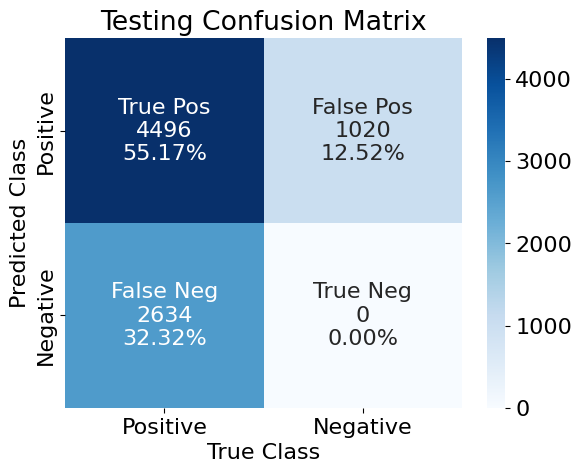

In [ ]:
# Define group names, axis labels, and group counts for the heatmap
group_names = ["True Pos","False Pos","False Neg","True Neg"]
x_axis_labels = ["Positive","Negative"]
y_axis_labels = ["Positive","Negative"]

# Get the counts and percentages for each group in the confusion matrix
group_counts = ["{0:0.0f}".format(value) for value in twodmatrix.flatten()]  # convert counts to strings
group_percentages = ["{0:.2%}".format(value) for value in twodmatrix.flatten()/np.sum(twodmatrix)]  # calculate percentages and convert to strings

# Create labels for each cell in the heatmap
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]  # combine group names, counts, and percentages
labels = np.asarray(labels).reshape(2, 2)  # reshape into a 2x2 array to match the size of the confusion matrix

# Create the heatmap using Seaborn
sns.heatmap(twodmatrix, annot=labels, fmt="", cmap='Blues', xticklabels=x_axis_labels, yticklabels=y_axis_labels)  # twodmatrix is the confusion matrix

# Add labels and title to the plot
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.title("Testing Confusion Matrix")

# Display the plot
plt.show()

In [ ]:
columns_to_include = list(class_with_freq.keys())
common_classes = []
columns_to_include.append("Background")
uncommon_classes = []
df = pd.read_csv("/content/drive/MyDrive/yolov5/runs/detect/Single_img3/heatmap.csv", index_col=0)
list1= list(df.columns)
print(len(list1))
for i in list1:
  if i in columns_to_include:
    common_classes.append(i)
  else:
    uncommon_classes.append(i)
print(len(common_classes))

94
64


In [ ]:
uncommon_classes

['392']

In [ ]:

# Define the CSV file path, the list of classes to remove, and the temporary output file path
temp_output_path = "temp.csv"

# Read the CSV file into a Pandas dataframe
df = pd.read_csv("/content/drive/MyDrive/yolov5/runs/detect/Single_img3/heatmap.csv", index_col=0)

# Remove the rows and columns corresponding to the classes specified in the list
df = df.drop(uncommon_classes, axis=0)
df = df.drop(uncommon_classes, axis=1)

# Save the modified dataframe as a new CSV file
df.to_csv(temp_output_path)

In [ ]:
df = pd.read_csv("/content/temp.csv")
len(df.columns)

65

In [ ]:
os.chdir("/content")
if os.path.exists("csv files") ==True:
  shutil.rmtree("csv files")
os.mkdir("csv files")
# Read CSV file containing confusion matrix with class labels
confusion_matrix_df = pd.read_csv("/content/temp.csv", index_col=0)
confusion_matrices = {}

# Extract confusion matrix values from the DataFrame
confusion_matrix = confusion_matrix_df.values

# Define the number of classes to display in each confusion matrix
num_display = 10

# Calculate the number of confusion matrices to display
num_matrices = int(np.ceil((confusion_matrix.shape[0] - 1) / num_display))

# Loop through the confusion matrix and display each section as a separate confusion matrix
for i in range(num_matrices):
  # Calculate the starting and ending indices for the rows and columns of the current section
  start_idx = i * num_display + 1
  end_idx = min(start_idx + num_display, confusion_matrix.shape[0])
  
  # Calculate the number of classes in the current section
  num_classes_curr = end_idx - start_idx
  
  # Create new confusion matrix with an additional background class
  bg_confusion_matrix = np.zeros((num_classes_curr+1, num_classes_curr+1))

  # Populate new confusion matrix with values from the original matrix
  bg_confusion_matrix[1:, 1:] = confusion_matrix[start_idx:end_idx, start_idx:end_idx]

  # Add up the row and column values for the background class
  bg_confusion_matrix[0, 1:] = confusion_matrix[0, start_idx:end_idx]
  bg_confusion_matrix[1:, 0] = confusion_matrix[start_idx:end_idx, 0]
  class_types = ["Background"] + [str(x) for x in confusion_matrix_df.columns[start_idx:end_idx]]
  confusion_matrixdf = pd.DataFrame(bg_confusion_matrix,columns = class_types,index = class_types)
  # matrixname= str("confusion_matrixdf")
  confusion_matrixdf.to_csv(str("/content/csv files/confusion_matrixdf {}.csv".format(i)))
  print(confusion_matrixdf)


            Background    1    2     4     6      9    12    14     15     16  \
Background         0.0  0.0  0.0   0.0   0.0    0.0   1.0   0.0    0.0    0.0   
1                  0.0  0.0  0.0   0.0   0.0    0.0   0.0   0.0    0.0    0.0   
2                  0.0  0.0  0.0   0.0   0.0    0.0   0.0   0.0    0.0    0.0   
4                  6.0  0.0  0.0  69.0   0.0    0.0   1.0   0.0    0.0    0.0   
6                 43.0  0.0  0.0   0.0  98.0    0.0   4.0   0.0    0.0    0.0   
9                 48.0  0.0  0.0   2.0   0.0  165.0   2.0   0.0    5.0    0.0   
12                21.0  0.0  0.0   0.0   0.0    1.0  68.0   0.0    0.0    0.0   
14               103.0  0.0  0.0   5.0   0.0    3.0   2.0  65.0   10.0    0.0   
15               169.0  0.0  0.0   2.0   0.0    3.0   0.0   0.0  486.0    0.0   
16                60.0  0.0  0.0   0.0   0.0    1.0   0.0   0.0    4.0  101.0   
17                 0.0  0.0  0.0   0.0   0.0    0.0   0.0   0.0    0.0    0.0   

             17  
Backgroun

In [ ]:
def create_heatmaps(directory):
  # Get a list of all the .csv files in the directory
  files = os.listdir(directory)
  csv_files = [file for file in files if file.endswith('.csv')]

  # Loop through each .csv file and create a heatmap
  for file in csv_files:
    # Read the data from the .csv file
    data = pd.read_csv(directory + file, index_col=0)

    # Get the range of classes
    classes = [int(c) for c in data.columns if c != 'Background']
    class_range = f"classes {min(classes)} to {max(classes)}"

    # Create the heatmap using seaborn
    sns.heatmap(data, cmap='Blues', annot=True, fmt='g', annot_kws={'fontsize': 12})
    # Add a title to the plot
    plt.title(f"Confusion Matrix for {class_range}", y=1.05)
    plt.figure(figsize=(10, 18))
    # Save the plot as a .png file with the class range as the name
    plt.subplots_adjust(top=45)
    plt.savefig(directory + class_range + '.png', bbox_inches='tight')

    # Show the plot
    plt.show()

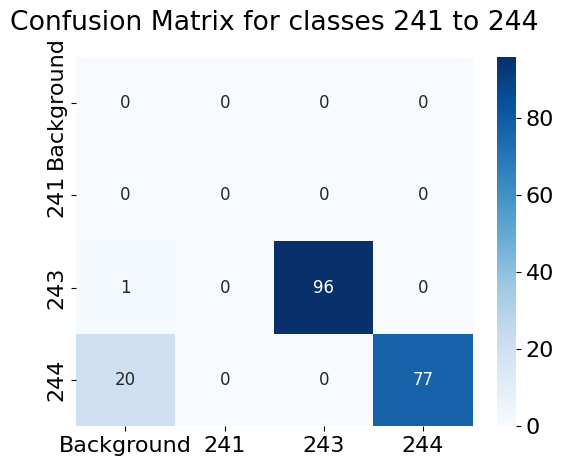

<Figure size 1000x1800 with 0 Axes>

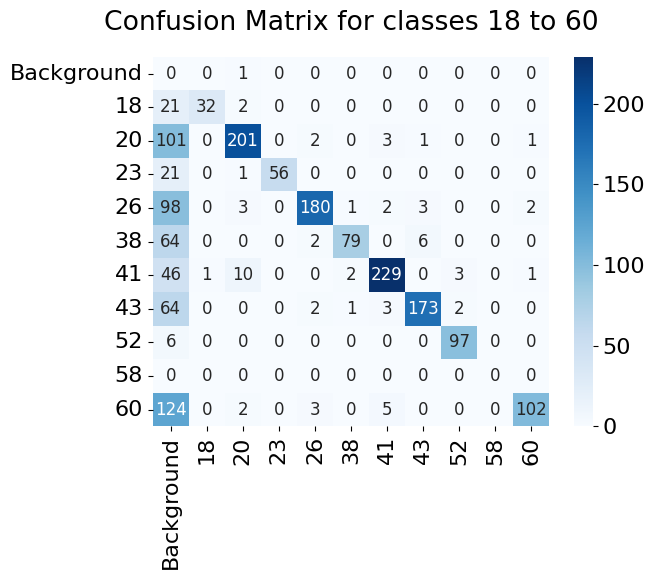

<Figure size 1000x1800 with 0 Axes>

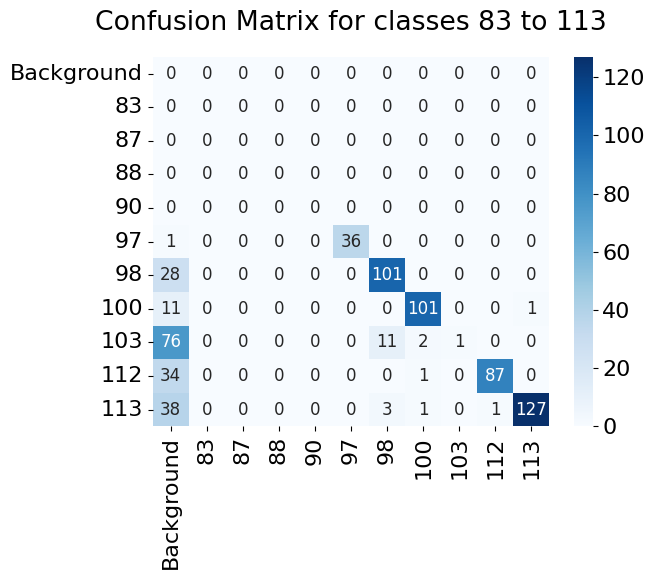

<Figure size 1000x1800 with 0 Axes>

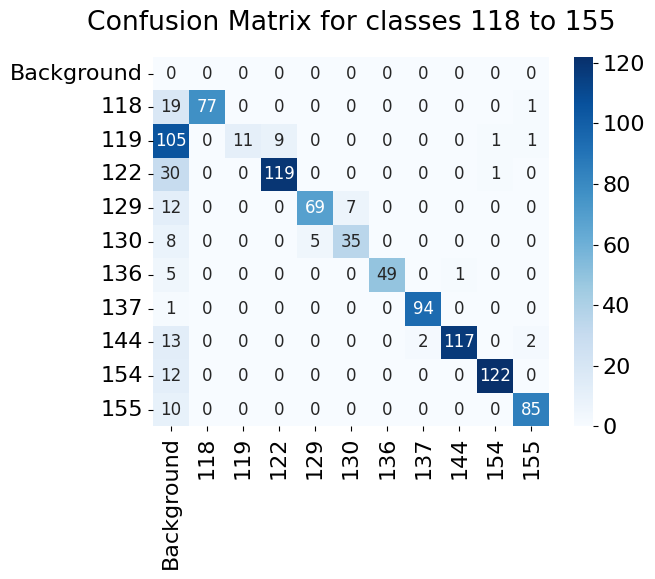

<Figure size 1000x1800 with 0 Axes>

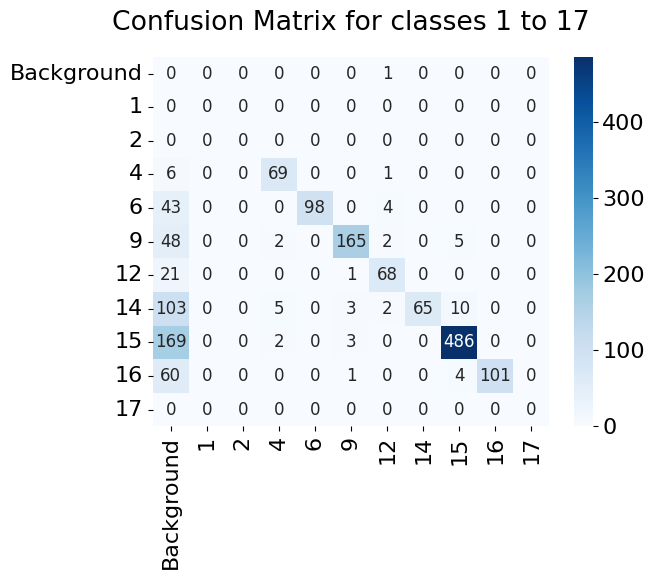

<Figure size 1000x1800 with 0 Axes>

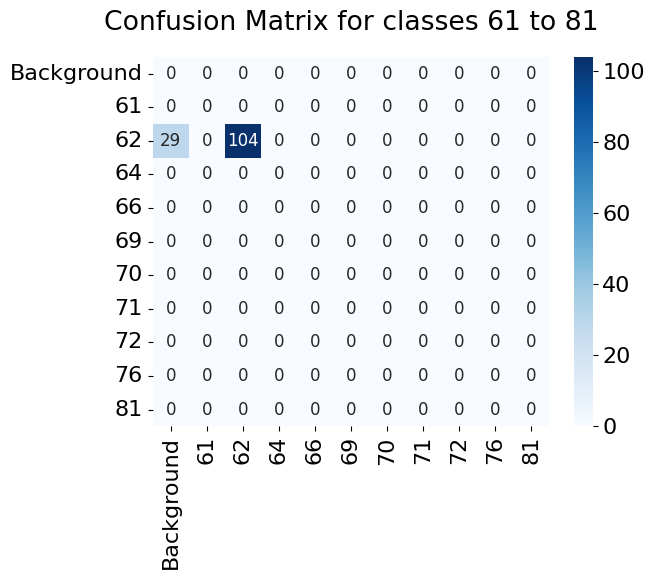

<Figure size 1000x1800 with 0 Axes>

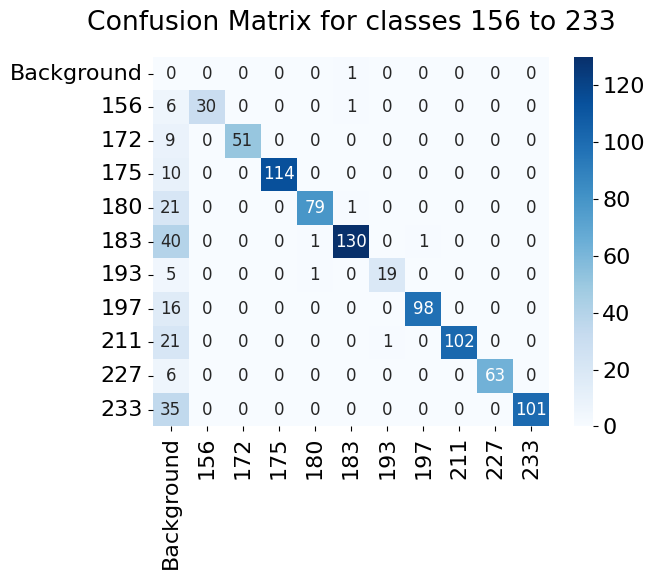

<Figure size 1000x1800 with 0 Axes>

In [ ]:
create_heatmaps("/content/csv files/")

In [ ]:
len(class_with_freq.keys())

63

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/RoadSignDataset/Yolov5 Results/Hyp Changes/Hyp Changes.csv")
x_col = "Parameter name"
y_col = "Relative Change"

# Create a bar chart using Seaborn
sns.barplot(x=x_col, y=y_col, data=data)
